# **Customer Segmentation Using Cluster Analysis (Clustering)**

---

*   *S/17/403 - Sumedha Kulasekara*
*   *S/17/404 - Lasantha Kulsooriya*



In [1]:
pip install datetimerange

Note: you may need to restart the kernel to use updated packages.


**Importing Packages & Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns

import datetime
from datetimerange import DateTimeRange

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**Importing the Dataset**

In [3]:
#Import file
amazon_sales_df  = pd.read_csv("./data/Amazon Sales FY2020-21.csv", low_memory = False)

#First 5 observations
amazon_sales_df.head()

order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

**Changing the Column Names**

In [4]:
column_names=['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'SKU', 'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount',
           'Total', 'Category', 'Payment_Method', 'By_St', 'Customer_Id', 'Year', 'Month',
           'Ref_Number', 'Name_Prefix', 'First_Name', 'Middle_Initial', 'Last_Name', 'Gender', 
           'Age', 'Full_Name', 'Email', 'Signed_Date', 'Phone_Number', 'Place_Name', 'County',
           'City', 'State', 'Zip_Code', 'Region', 'User_Name', 'Discount_Percent']
amazon_sales_df.columns = column_names;
pd.set_option('display.max_columns', None)
amazon_sales_df.head()

Order_Id  Order_Date    Status  Item_Id                  SKU  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD   

   Quantity_Ordered  Price   Value  Discount_Amount   Total       Category  \
0                21   89.9  1798.0              0.0  1798.0  Men's Fashion   
1                11   19.0   190.0              0.0   190.0  Men's Fashion   
2                 9  149.9  1199.2              0.0  1199.2  Men's Fashion   
3                 9   79.9   639.2              0.0   639.2  Men's Fashion   
4                 2   99.9    99.9              0.0    99.9  Men's Fashion   

  Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
0            cod  Valid        60124  2020  Oct-20      987867        Drs.   
1            cod  Valid        60124  2020  Oct-20      987867        Drs.   
2            cod    Net        60124  2020  Oct-20      987867        Drs.   
3            cod    Net        60124  2020  Oct-20      987867        Drs.   
4            cod  Valid        60124  2020  Nov-20      987867        Drs.   

  First_Name Middle_Initial Last_Name Gender  Age    Full_Name  \
0       Jani              W     Titus      F   43  Titus, Jani   
1       Jani              W     Titus      F   43  Titus, Jani   
2       Jani              W     Titus      F   43  Titus, Jani   
3       Jani              W     Titus      F   43  Titus, Jani   
4       Jani              W     Titus      F   43  Titus, Jani   

                  Email Signed_Date  Phone_Number Place_Name  County    City  \
0  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
1  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
2  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
3  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
4  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   

  State  Zip_Code Region User_Name  Discount_Percent  
0    OK     73571  South   jwtitus               0.0  
1    OK     73571  South   jwtitus               0.0  
2    OK     73571  South   jwtitus               0.0  
3    OK     73571  South   jwtitus               0.0  
4    OK     73571  South   jwtitus               0.0

**Dimensions of the Dataset**

In [5]:
amazon_sales_df.ndim

2

Dataset is 2 dimention. Which is a dataframe.

In [6]:
amazon_sales_df.shape

(286392, 35)

Dataset contains 286392 observations in 35 variables.

**Structure of the Dataset**

In [7]:
#Datatypes and null count
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_Id          286392 non-null  object 
 1   Order_Date        286392 non-null  object 
 2   Status            286392 non-null  object 
 3   Item_Id           286392 non-null  int64  
 4   SKU               286392 non-null  object 
 5   Quantity_Ordered  286392 non-null  int64  
 6   Price             286392 non-null  float64
 7   Value             286392 non-null  float64
 8   Discount_Amount   286392 non-null  float64
 9   Total             286392 non-null  float64
 10  Category          286392 non-null  object 
 11  Payment_Method    286392 non-null  object 
 12  By_St             286392 non-null  object 
 13  Customer_Id       286392 non-null  int64  
 14  Year              286392 non-null  int64  
 15  Month             286392 non-null  object 
 16  Ref_Number        28

In [8]:
#Datatypes count
amazon_sales_df.dtypes.value_counts()

object     23
int64       7
float64     5
dtype: int64

Dataset contains 35 variables including 23 categorical variables and 12 numerical variables which contains 7 integer variables and 5 decimal variables.

**Null Values**

In [9]:
amazon_sales_df.isna().sum()

Order_Id            0
Order_Date          0
Status              0
Item_Id             0
SKU                 0
Quantity_Ordered    0
Price               0
Value               0
Discount_Amount     0
Total               0
Category            0
Payment_Method      0
By_St               0
Customer_Id         0
Year                0
Month               0
Ref_Number          0
Name_Prefix         0
First_Name          0
Middle_Initial      0
Last_Name           0
Gender              0
Age                 0
Full_Name           0
Email               0
Signed_Date         0
Phone_Number        0
Place_Name          0
County              0
City                0
State               0
Zip_Code            0
Region              0
User_Name           0
Discount_Percent    0
dtype: int64

There are no null values.

**Duplicate Values**

In [10]:
amazon_sales_df.duplicated().sum()

0

There are no duplicated values in this dataset.

**Unique Values**

In [11]:
amazon_sales_df.nunique()

Order_Id            201716
Order_Date             365
Status                  13
Item_Id             286392
SKU                  47932
Quantity_Ordered        72
Price                 7561
Value                10607
Discount_Amount      13732
Total                23755
Category                15
Payment_Method          13
By_St                    3
Customer_Id          64248
Year                     2
Month                   12
Ref_Number           62065
Name_Prefix              7
First_Name            5161
Middle_Initial          26
Last_Name            18208
Gender                   2
Age                     58
Full_Name            64212
Email                64246
Signed_Date          11647
Phone_Number         64248
Place_Name           15892
County                2551
City                 15892
State                   51
Zip_Code             33773
Region                   4
User_Name            64006
Discount_Percent     17009
dtype: int64

### **Data Preprocessing**



---



**Analyzing Discounts and Total Value**





In [12]:
#Making new dataframe with selected columns
new_df = amazon_sales_df[['Order_Id', 'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount', 'Total']]
pd.set_option('mode.chained_assignment', None)
new_df['New_Value']=new_df['Quantity_Ordered']*new_df["Price"]
new_df['New_Total'] = new_df['New_Value'] - new_df['Discount_Amount']
new_df.head(10)

Order_Id  Quantity_Ordered  Price   Value  Discount_Amount   Total  \
0  100354678                21   89.9  1798.0              0.0  1798.0   
1  100354678                11   19.0   190.0              0.0   190.0   
2  100354680                 9  149.9  1199.2              0.0  1199.2   
3  100354680                 9   79.9   639.2              0.0   639.2   
4  100367357                 2   99.9    99.9              0.0    99.9   
5  100367357                 2   39.9    39.9              0.0    39.9   
6  100367360                 2   47.6    47.6              0.0    47.6   
7  100354677                 2   49.0    49.0              0.0    49.0   
8  100354677                 2  135.0   135.0              0.0   135.0   
9  100354677                 2  549.9   549.9              0.0   549.9   

   New_Value  New_Total  
0     1887.9     1887.9  
1      209.0      209.0  
2     1349.1     1349.1  
3      719.1      719.1  
4      199.8      199.8  
5       79.8       79.8  
6       95.2       95.2  
7       98.0       98.0  
8      270.0      270.0  
9     1099.8     1099.8

In [13]:
#Marking discounted values
new_df['Is_Discounted'] = np.where(new_df['Discount_Amount'] > 0 , True, False)
new_df.head(10)

Order_Id  Quantity_Ordered  Price   Value  Discount_Amount   Total  \
0  100354678                21   89.9  1798.0              0.0  1798.0   
1  100354678                11   19.0   190.0              0.0   190.0   
2  100354680                 9  149.9  1199.2              0.0  1199.2   
3  100354680                 9   79.9   639.2              0.0   639.2   
4  100367357                 2   99.9    99.9              0.0    99.9   
5  100367357                 2   39.9    39.9              0.0    39.9   
6  100367360                 2   47.6    47.6              0.0    47.6   
7  100354677                 2   49.0    49.0              0.0    49.0   
8  100354677                 2  135.0   135.0              0.0   135.0   
9  100354677                 2  549.9   549.9              0.0   549.9   

   New_Value  New_Total  Is_Discounted  
0     1887.9     1887.9          False  
1      209.0      209.0          False  
2     1349.1     1349.1          False  
3      719.1      719.1          False  
4      199.8      199.8          False  
5       79.8       79.8          False  
6       95.2       95.2          False  
7       98.0       98.0          False  
8      270.0      270.0          False  
9     1099.8     1099.8          False

In [14]:
#Marking wrong total values
new_df['Is_Correct_Total'] = np.where((new_df['Total'] == new_df['New_Total'] ), True, False)
new_df.head(10)

Order_Id  Quantity_Ordered  Price   Value  Discount_Amount   Total  \
0  100354678                21   89.9  1798.0              0.0  1798.0   
1  100354678                11   19.0   190.0              0.0   190.0   
2  100354680                 9  149.9  1199.2              0.0  1199.2   
3  100354680                 9   79.9   639.2              0.0   639.2   
4  100367357                 2   99.9    99.9              0.0    99.9   
5  100367357                 2   39.9    39.9              0.0    39.9   
6  100367360                 2   47.6    47.6              0.0    47.6   
7  100354677                 2   49.0    49.0              0.0    49.0   
8  100354677                 2  135.0   135.0              0.0   135.0   
9  100354677                 2  549.9   549.9              0.0   549.9   

   New_Value  New_Total  Is_Discounted  Is_Correct_Total  
0     1887.9     1887.9          False             False  
1      209.0      209.0          False             False  
2     1349.1     1349.1          False             False  
3      719.1      719.1          False             False  
4      199.8      199.8          False             False  
5       79.8       79.8          False             False  
6       95.2       95.2          False             False  
7       98.0       98.0          False             False  
8      270.0      270.0          False             False  
9     1099.8     1099.8          False             False

**Cross Table For Dicounts and Total**

In [15]:
crosstab1 =pd.crosstab(new_df['Is_Discounted'], new_df['Is_Correct_Total'], margins = True)
print(crosstab1)

Is_Correct_Total   False  True     All
Is_Discounted                         
False             199084  1574  200658
True               85734     0   85734
All               284818  1574  286392


In [16]:
crosstab2 =pd.crosstab(new_df['Is_Discounted'], new_df['Is_Correct_Total'], margins = True ,normalize = True).style.format('{:.2%}')
crosstab2

The two cross tables show that 85,734 customers, or 29.94% of all customers, received discounts. 200,658 customers  didn't get any discount, which is 70.06% from the total customers. And all the discounted customers have a wrong total. And from non-discounted customers, 69.51% customers total is wrong.

99.94% of values in Total column is wrong.

In [17]:
new_df2 = new_df
new_df2['Total'] = np.where(new_df['Is_Correct_Total'] != True, new_df['New_Total'], new_df['Total'] )
new_df2['Is_Correct_Total'] = np.where((new_df2['Total'] == new_df2['New_Total'] ), True, False)
crosstab3 =pd.crosstab(new_df2['Is_Discounted'], new_df['Is_Correct_Total'], margins = True)
print(crosstab3)

Is_Correct_Total    True     All
Is_Discounted                   
False             200658  200658
True               85734   85734
All               286392  286392


In [18]:
#Updating Correct Total values and 
amazon_sales_df['Total'] = new_df['Total']
amazon_sales_df['Value'] =  new_df['New_Value']
amazon_sales_df.head()

Order_Id  Order_Date    Status  Item_Id                  SKU  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD   

   Quantity_Ordered  Price   Value  Discount_Amount   Total       Category  \
0                21   89.9  1887.9              0.0  1887.9  Men's Fashion   
1                11   19.0   209.0              0.0   209.0  Men's Fashion   
2                 9  149.9  1349.1              0.0  1349.1  Men's Fashion   
3                 9   79.9   719.1              0.0   719.1  Men's Fashion   
4                 2   99.9   199.8              0.0   199.8  Men's Fashion   

  Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
0            cod  Valid        60124  2020  Oct-20      987867        Drs.   
1            cod  Valid        60124  2020  Oct-20      987867        Drs.   
2            cod    Net        60124  2020  Oct-20      987867        Drs.   
3            cod    Net        60124  2020  Oct-20      987867        Drs.   
4            cod  Valid        60124  2020  Nov-20      987867        Drs.   

  First_Name Middle_Initial Last_Name Gender  Age    Full_Name  \
0       Jani              W     Titus      F   43  Titus, Jani   
1       Jani              W     Titus      F   43  Titus, Jani   
2       Jani              W     Titus      F   43  Titus, Jani   
3       Jani              W     Titus      F   43  Titus, Jani   
4       Jani              W     Titus      F   43  Titus, Jani   

                  Email Signed_Date  Phone_Number Place_Name  County    City  \
0  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
1  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
2  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
3  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   
4  jani.titus@gmail.com   8/22/2006  405-959-1129     Vinson  Harmon  Vinson   

  State  Zip_Code Region User_Name  Discount_Percent  
0    OK     73571  South   jwtitus               0.0  
1    OK     73571  South   jwtitus               0.0  
2    OK     73571  South   jwtitus               0.0  
3    OK     73571  South   jwtitus               0.0  
4    OK     73571  South   jwtitus               0.0

In [19]:
amazon_sales_df[amazon_sales_df['Discount_Amount']>0].head()

Order_Id  Order_Date    Status  Item_Id                  SKU  \
12  100403034  24/12/2020  canceled   656937  APPWES59CA4D59CB41A   
13  100403034  24/12/2020  canceled   656938  APPPHI5A09939191938   
14  100403034  24/12/2020  canceled   656939  HALSHO59F836EF959B9   
15  100403077  24/12/2020  canceled   657023  APPWES59CA4D59CB41A   
16  100403077  24/12/2020  canceled   657024  APPPHI5A09939191938   

    Quantity_Ordered  Price  Value  Discount_Amount      Total       Category  \
12                 2  254.8  509.6         39.80628  469.79372     Appliances   
13                 2  315.5  631.0         49.28917  581.71083     Appliances   
14                 2   69.8  139.6         10.90455  128.69545  Home & Living   
15                 2  254.8  509.6         39.80628  469.79372     Appliances   
16                 2  315.5  631.0         49.28917  581.71083     Appliances   

   Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
12        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
13        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
14        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
15        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   
16        Easypay  Gross        42485  2020  Dec-20      171143       Prof.   

   First_Name Middle_Initial Last_Name Gender  Age   Full_Name  \
12        Lee              S     Eaker      M   28  Eaker, Lee   
13        Lee              S     Eaker      M   28  Eaker, Lee   
14        Lee              S     Eaker      M   28  Eaker, Lee   
15        Lee              S     Eaker      M   28  Eaker, Lee   
16        Lee              S     Eaker      M   28  Eaker, Lee   

                  Email Signed_Date  Phone_Number Place_Name    County  \
12  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
13  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
14  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
15  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   
16  lee.eaker@gmail.com  02/04/1981  239-335-6755     Graham  Bradford   

      City State  Zip_Code Region User_Name  Discount_Percent  
12  Graham    FL     32042  South   lseaker         15.622559  
13  Graham    FL     32042  South   lseaker         15.622558  
14  Graham    FL     32042  South   lseaker         15.622564  
15  Graham    FL     32042  South   lseaker         15.622559  
16  Graham    FL     32042  South   lseaker         15.622558

**Order Date & Signed Date**

In [20]:
#Converting 'Order Date' in to datetime type
amazon_sales_df["Order_Date"] = pd.to_datetime(amazon_sales_df["Order_Date"])
print (amazon_sales_df["Order_Date"].dtypes)

datetime64[ns]


C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/10/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ls97k\anaconda3\envs\virEnv\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/12/2020

In [21]:
#coverting 'Signed_Date' to datetime type
amazon_sales_df["Signed_Date"] = pd.to_datetime(amazon_sales_df["Signed_Date"])
print (amazon_sales_df["Signed_Date"].dtypes)

datetime64[ns]


**Check Time Period**

In [22]:
df3 = amazon_sales_df
#Order Date
Order_date_range = DateTimeRange(df3['Order_Date'].dt.date.min(), df3['Order_Date'].dt.date.max())
"Order dates are from "+ str(Order_date_range)[0:10] +" to "+ str(Order_date_range)[22:32]

'Order dates are from 2020-01-10 to 2021-12-09'

In [23]:
Order_date_range = DateTimeRange(df3['Signed_Date'].dt.date.min(), df3['Signed_Date'].dt.date.max())
"Signed dates are from "+ str(Order_date_range)[0:10] +" to "+ str(Order_date_range)[22:32]

'Signed dates are from 1978-11-04 to 2017-07-28'

Signed Dates cannot contain dates before 1994 . Because Amazon is founded in 1994 -07-05

In [24]:
d=len(df3[df3['Signed_Date'] <= '1994-07-05' ])
c = (d/len(df3))*100
print(d,c)

28782 10.049861727981229


There are 28782 dates before 1994-07-05. Which is 10.05% of the total observations.

In [25]:
amazon_sales_df['Is_Discount']=amazon_sales_df.Discount_Amount>0

In [26]:
amazon_sales_df.head()

Order_Id Order_Date    Status  Item_Id                  SKU  \
0  100354678 2020-01-10  received   574772   oasis_Oasis-064-36   
1  100354678 2020-01-10  received   574774      Fantastic_FT-48   
2  100354680 2020-01-10  complete   574777      mdeal_DMC-610-8   
3  100354680 2020-01-10  complete   574779   oasis_Oasis-061-36   
4  100367357 2020-11-13  received   595185  MEFNAR59C38B6CA08CD   

   Quantity_Ordered  Price   Value  Discount_Amount   Total       Category  \
0                21   89.9  1887.9              0.0  1887.9  Men's Fashion   
1                11   19.0   209.0              0.0   209.0  Men's Fashion   
2                 9  149.9  1349.1              0.0  1349.1  Men's Fashion   
3                 9   79.9   719.1              0.0   719.1  Men's Fashion   
4                 2   99.9   199.8              0.0   199.8  Men's Fashion   

  Payment_Method  By_St  Customer_Id  Year   Month  Ref_Number Name_Prefix  \
0            cod  Valid        60124  2020  Oct-20      987867        Drs.   
1            cod  Valid        60124  2020  Oct-20      987867        Drs.   
2            cod    Net        60124  2020  Oct-20      987867        Drs.   
3            cod    Net        60124  2020  Oct-20      987867        Drs.   
4            cod  Valid        60124  2020  Nov-20      987867        Drs.   

  First_Name Middle_Initial Last_Name Gender  Age    Full_Name  \
0       Jani              W     Titus      F   43  Titus, Jani   
1       Jani              W     Titus      F   43  Titus, Jani   
2       Jani              W     Titus      F   43  Titus, Jani   
3       Jani              W     Titus      F   43  Titus, Jani   
4       Jani              W     Titus      F   43  Titus, Jani   

                  Email Signed_Date  Phone_Number Place_Name  County    City  \
0  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
1  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
2  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
3  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   
4  jani.titus@gmail.com  2006-08-22  405-959-1129     Vinson  Harmon  Vinson   

  State  Zip_Code Region User_Name  Discount_Percent  Is_Discount  
0    OK     73571  South   jwtitus               0.0        False  
1    OK     73571  South   jwtitus               0.0        False  
2    OK     73571  South   jwtitus               0.0        False  
3    OK     73571  South   jwtitus               0.0        False  
4    OK     73571  South   jwtitus               0.0        False

In [33]:
df_cancelled = amazon_sales_df[amazon_sales_df['Status']=='canceled']
df_cancelled.head()

Order_Id Order_Date    Status  Item_Id                        SKU  \
7   100354677 2020-01-10  canceled   574769         GFE_19_USBLEDLight   
8   100354677 2020-01-10  canceled   574770  oasis_Kingston-32GB-DTIG4   
9   100354677 2020-01-10  canceled   574771             Geepas_GSB5420   
12  100403034 2020-12-24  canceled   656937        APPWES59CA4D59CB41A   
13  100403034 2020-12-24  canceled   656938        APPPHI5A09939191938   

    Quantity_Ordered  Price   Value  Discount_Amount       Total  \
7                  2   49.0    98.0          0.00000    98.00000   
8                  2  135.0   270.0          0.00000   270.00000   
9                  2  549.9  1099.8          0.00000  1099.80000   
12                 2  254.8   509.6         39.80628   469.79372   
13                 2  315.5   631.0         49.28917   581.71083   

             Category Payment_Method  By_St  Customer_Id  Year   Month  \
7   Mobiles & Tablets        Payaxis  Gross        42485  2020  Oct-20   
8           Computing        Payaxis  Gross        42485  2020  Oct-20   
9          Appliances        Payaxis  Gross        42485  2020  Oct-20   
12         Appliances        Easypay  Gross        42485  2020  Dec-20   
13         Appliances        Easypay  Gross        42485  2020  Dec-20   

    Ref_Number Name_Prefix First_Name Middle_Initial Last_Name Gender  Age  \
7       171143       Prof.        Lee              S     Eaker      M   28   
8       171143       Prof.        Lee              S     Eaker      M   28   
9       171143       Prof.        Lee              S     Eaker      M   28   
12      171143       Prof.        Lee              S     Eaker      M   28   
13      171143       Prof.        Lee              S     Eaker      M   28   

     Full_Name                Email Signed_Date  Phone_Number Place_Name  \
7   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
8   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
9   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
12  Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
13  Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   

      County    City State  Zip_Code Region User_Name  Discount_Percent  \
7   Bradford  Graham    FL     32042  South   lseaker          0.000000   
8   Bradford  Graham    FL     32042  South   lseaker          0.000000   
9   Bradford  Graham    FL     32042  South   lseaker          0.000000   
12  Bradford  Graham    FL     32042  South   lseaker         15.622559   
13  Bradford  Graham    FL     32042  South   lseaker         15.622558   

    Is_Discount  
7         False  
8         False  
9         False  
12         True  
13         True

# **KMODE CLUSTERING**

In [34]:
amazon_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Id          286392 non-null  object        
 1   Order_Date        286392 non-null  datetime64[ns]
 2   Status            286392 non-null  object        
 3   Item_Id           286392 non-null  int64         
 4   SKU               286392 non-null  object        
 5   Quantity_Ordered  286392 non-null  int64         
 6   Price             286392 non-null  float64       
 7   Value             286392 non-null  float64       
 8   Discount_Amount   286392 non-null  float64       
 9   Total             286392 non-null  float64       
 10  Category          286392 non-null  object        
 11  Payment_Method    286392 non-null  object        
 12  By_St             286392 non-null  object        
 13  Customer_Id       286392 non-null  int64         
 14  Year

In [35]:
amazon_sales_df.columns

Index(['Order_Id', 'Order_Date', 'Status', 'Item_Id', 'SKU',
       'Quantity_Ordered', 'Price', 'Value', 'Discount_Amount', 'Total',
       'Category', 'Payment_Method', 'By_St', 'Customer_Id', 'Year', 'Month',
       'Ref_Number', 'Name_Prefix', 'First_Name', 'Middle_Initial',
       'Last_Name', 'Gender', 'Age', 'Full_Name', 'Email', 'Signed_Date',
       'Phone_Number', 'Place_Name', 'County', 'City', 'State', 'Zip_Code',
       'Region', 'User_Name', 'Discount_Percent', 'Is_Discount'],
      dtype='object')

In [36]:
cat_df=df_cancelled[["Status","Category","Payment_Method","By_St","Gender","State",'Place_Name', 'County',"Is_Discount","City","User_Name","Region","Month","Age"]]
cat_df.head()

Status           Category Payment_Method  By_St Gender State Place_Name  \
7   canceled  Mobiles & Tablets        Payaxis  Gross      M    FL     Graham   
8   canceled          Computing        Payaxis  Gross      M    FL     Graham   
9   canceled         Appliances        Payaxis  Gross      M    FL     Graham   
12  canceled         Appliances        Easypay  Gross      M    FL     Graham   
13  canceled         Appliances        Easypay  Gross      M    FL     Graham   

      County  Is_Discount    City User_Name Region   Month  Age  
7   Bradford        False  Graham   lseaker  South  Oct-20   28  
8   Bradford        False  Graham   lseaker  South  Oct-20   28  
9   Bradford        False  Graham   lseaker  South  Oct-20   28  
12  Bradford         True  Graham   lseaker  South  Dec-20   28  
13  Bradford         True  Graham   lseaker  South  Dec-20   28

In [37]:
# Data pre-processing
cat_df.drop(["Status","Place_Name","County","Month","City","User_Name"], axis = 1, inplace = True)
# Show the data after pre-processing
print('Dimension data: {} rows and {} columns'.format(len(cat_df), len(cat_df.columns)))
cat_df.head()

Dimension data: 112166 rows and 8 columns


Category Payment_Method  By_St Gender State  Is_Discount Region  \
7   Mobiles & Tablets        Payaxis  Gross      M    FL        False  South   
8           Computing        Payaxis  Gross      M    FL        False  South   
9          Appliances        Payaxis  Gross      M    FL        False  South   
12         Appliances        Easypay  Gross      M    FL         True  South   
13         Appliances        Easypay  Gross      M    FL         True  South   

    Age  
7    28  
8    28  
9    28  
12   28  
13   28

In [38]:
cat_df.nunique()

Category          15
Payment_Method    12
By_St              1
Gender             2
State             51
Is_Discount        2
Region             4
Age               58
dtype: int64

In [39]:
print(cat_df['Age'].max())

75


In [40]:
cat_df['age_bin'] = pd.cut(cat_df['Age'], [0, 12, 19, 30, 45, 70, 100], 
                              labels=['0-12', '12-19', '19-30', '30-45','45-70','70-100'])
cat_df  = cat_df.drop('Age',axis = 1)
cat_df.head()

Category Payment_Method  By_St Gender State  Is_Discount Region  \
7   Mobiles & Tablets        Payaxis  Gross      M    FL        False  South   
8           Computing        Payaxis  Gross      M    FL        False  South   
9          Appliances        Payaxis  Gross      M    FL        False  South   
12         Appliances        Easypay  Gross      M    FL         True  South   
13         Appliances        Easypay  Gross      M    FL         True  South   

   age_bin  
7    19-30  
8    19-30  
9    19-30  
12   19-30  
13   19-30

In [41]:
cat_df.shape

(112166, 8)

In [42]:
cat_df.describe()

Category Payment_Method   By_St  Gender   State Is_Discount  \
count              112166         112166  112166  112166  112166      112166   
unique                 15             12       1       2      51           2   
top     Mobiles & Tablets        Easypay   Gross       M      TX       False   
freq                30271          42063  112166   56512    7014       77525   

        Region age_bin  
count   112166  112166  
unique       4       5  
top      South   45-70  
freq     40929   48353

In [43]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112166 entries, 7 to 286385
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Category        112166 non-null  object  
 1   Payment_Method  112166 non-null  object  
 2   By_St           112166 non-null  object  
 3   Gender          112166 non-null  object  
 4   State           112166 non-null  object  
 5   Is_Discount     112166 non-null  bool    
 6   Region          112166 non-null  object  
 7   age_bin         112166 non-null  category
dtypes: bool(1), category(1), object(6)
memory usage: 6.2+ MB


In [44]:
cat_df.isnull().sum()*100/cat_df.shape[0]

Category          0.0
Payment_Method    0.0
By_St             0.0
Gender            0.0
State             0.0
Is_Discount       0.0
Region            0.0
age_bin           0.0
dtype: float64

**Model Building**

In [45]:
# First we will keep a copy of data
cat_df_copy = cat_df.copy()

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
cat_df.head()

Category  Payment_Method  By_St  Gender  State  Is_Discount  Region  \
7          9               2      0       1      9            0       2   
8          3               2      0       1      9            0       2   
9          0               2      0       1      9            0       2   
12         0               0      0       1      9            1       2   
13         0               0      0       1      9            1       2   

    age_bin  
7         1  
8         1  
9         1  
12        1  
13        1

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_df = cat_df.apply(le.fit_transform)
cat_df.head()

Category  Payment_Method  By_St  Gender  State  Is_Discount  Region  \
7          9               2      0       1      9            0       2   
8          3               2      0       1      9            0       2   
9          0               2      0       1      9            0       2   
12         0               0      0       1      9            1       2   
13         0               0      0       1      9            1       2   

    age_bin  
7         1  
8         1  
9         1  
12        1  
13        1

In [48]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [49]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from kmodes.kmodes import KModes

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cat_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 438201.0


In [50]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [51]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = cat_df.columns

In [52]:
# Mode of the clusters
clusterCentroidsDf

Category  Payment_Method  By_St  Gender  State  Is_Discount  Region  \
0         9               0      0       1     43            0       2   
1        10               2      0       0     14            1       0   

   age_bin  
0        3  
1        2

In [53]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(cat_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8900, cost: 441070.0


In [54]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

**Choosing K by comparing Cost against each K**

In [55]:
cost = []
for num_clusters in list(range(1,20)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(cat_df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 482495.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 438201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 413480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6161, cost: 390344.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6158, cost: 379539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6130, cost: 369522.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5800, cost: 360922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations..

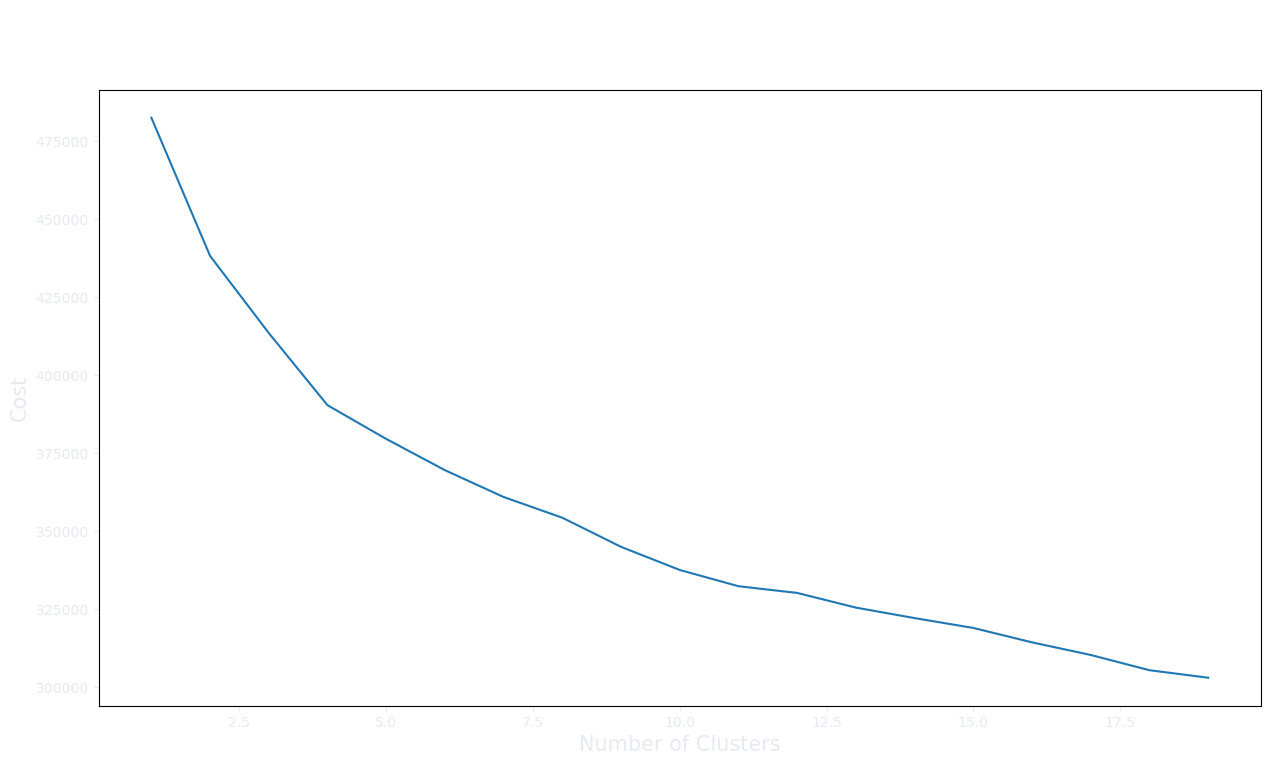

In [58]:
y = np.array([i for i in range(1,20,1)])
plt.figure(figsize=(15,8))
plt.plot(y,cost)
plt.xlabel("Number of Clusters", fontsize = 15)
plt.ylabel("Cost", fontsize = 15)
#Title 
plt.suptitle('Elbow grpah using cost function ', fontsize=20,fontweight="bold")
#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'
#save plot
plt.savefig("cancel_df/kmode_elbow_cancel", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

To determine the optimal number of clusters, the Elbow method is used but it is modified to use within-cluster difference. From the results of plotting within-cluster differences for various values, the principle of the Elbow method takes the value of k at the point when the value does not decrease significantly with the addition of the value of k.

In [59]:
## Choosing K=10
km_cao = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cat_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6646, cost: 337531.0


In [60]:
fitClusters_cao

array([0, 6, 6, ..., 0, 3, 3], dtype=uint16)

**Combining the predicted clusters with the original DF.**

In [61]:
cat_df = cat_df_copy.reset_index()

In [62]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([cat_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

combinedDf.head()

Category Payment_Method  By_St Gender State  Is_Discount Region  \
0  Mobiles & Tablets        Payaxis  Gross      M    FL        False  South   
1          Computing        Payaxis  Gross      M    FL        False  South   
2         Appliances        Payaxis  Gross      M    FL        False  South   
3         Appliances        Easypay  Gross      M    FL         True  South   
4         Appliances        Easypay  Gross      M    FL         True  South   

  age_bin  cluster_predicted  
0   19-30                  0  
1   19-30                  6  
2   19-30                  6  
3   19-30                  9  
4   19-30                  9

In [63]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]
cluster_8 = combinedDf[combinedDf['cluster_predicted'] == 8]
cluster_9 = combinedDf[combinedDf['cluster_predicted'] == 9]

In [64]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39004 entries, 0 to 112163
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Category           39004 non-null  object  
 1   Payment_Method     39004 non-null  object  
 2   By_St              39004 non-null  object  
 3   Gender             39004 non-null  object  
 4   State              39004 non-null  object  
 5   Is_Discount        39004 non-null  bool    
 6   Region             39004 non-null  object  
 7   age_bin            39004 non-null  category
 8   cluster_predicted  39004 non-null  uint16  
dtypes: bool(1), category(1), object(6), uint16(1)
memory usage: 2.2+ MB


In [65]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13642 entries, 33 to 112143
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Category           13642 non-null  object  
 1   Payment_Method     13642 non-null  object  
 2   By_St              13642 non-null  object  
 3   Gender             13642 non-null  object  
 4   State              13642 non-null  object  
 5   Is_Discount        13642 non-null  bool    
 6   Region             13642 non-null  object  
 7   age_bin            13642 non-null  category
 8   cluster_predicted  13642 non-null  uint16  
dtypes: bool(1), category(1), object(6), uint16(1)
memory usage: 799.6+ KB


In [81]:
pip install colorcet

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement colorcet (from versions: none)
ERROR: No matching distribution found for colorcet


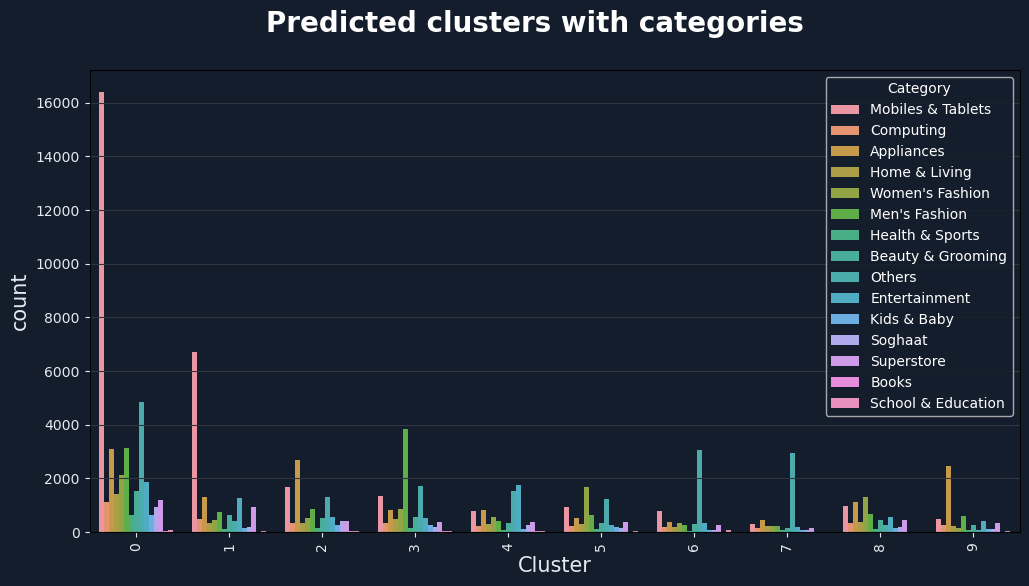

In [87]:
#category
plt.figure(figsize = (12,6),facecolor='#141d2b')
qualitative_colors = sns.color_palette("Dark2", 11)
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().sort_index(ascending=True).index,hue=combinedDf['Category'],palette =qualitative_colors)
plt.xticks(rotation=90,fontsize=10)


#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with categories ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmode category", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

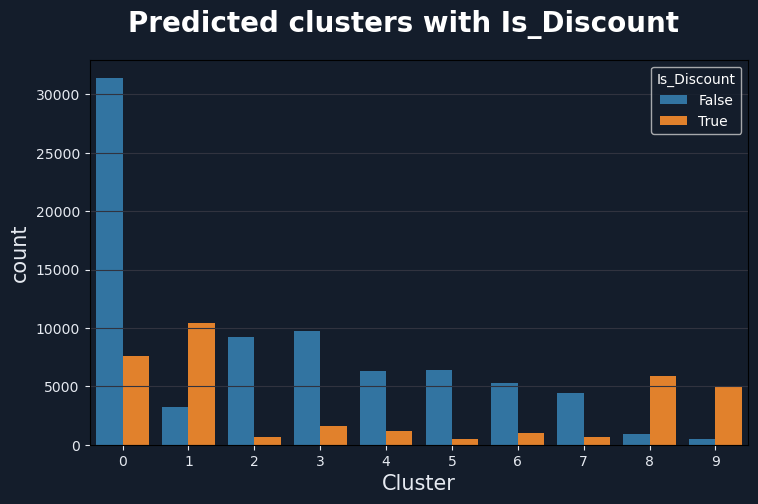

In [89]:
#Is_Discounted
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Is_Discount'])

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)

#Title 
plt.suptitle('Predicted clusters with Is_Discount ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmode isdiscount", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

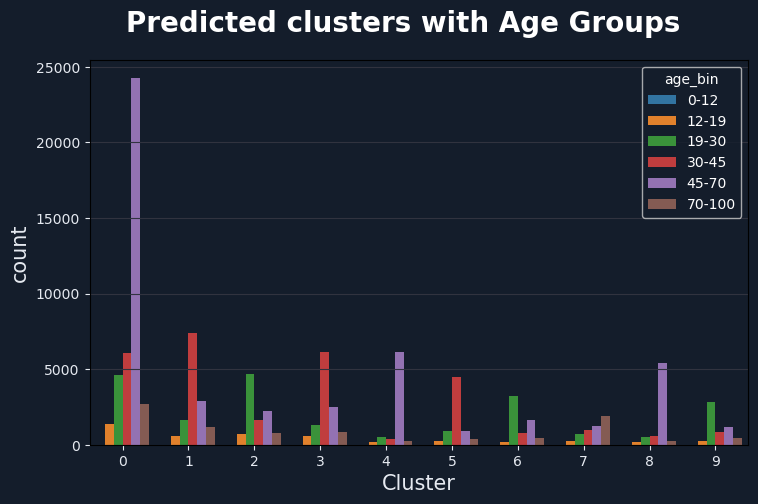

In [90]:
#age_bin
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['age_bin'])
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)

#Title 
plt.suptitle('Predicted clusters with Age Groups ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmode agebins", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

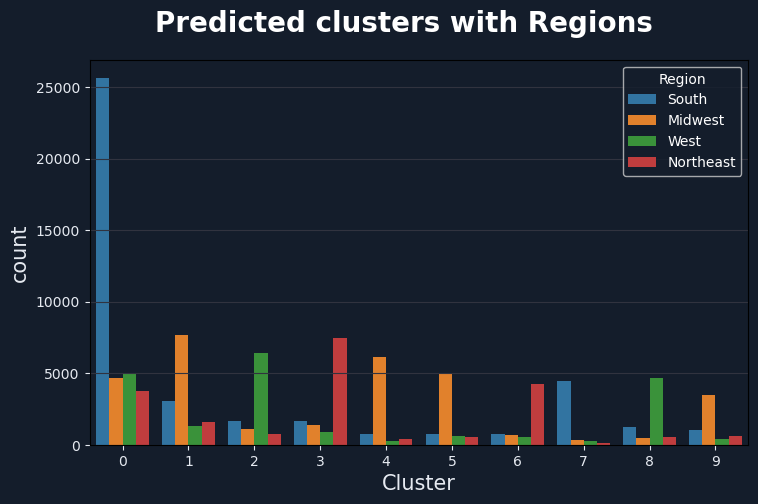

In [91]:
#Region
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Region'])
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)

#Title 
plt.suptitle('Predicted clusters with Regions ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmode Regions", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

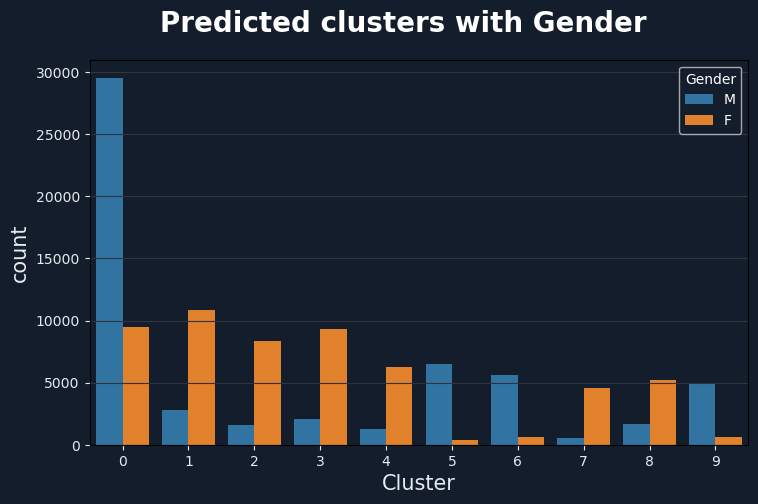

In [92]:
#Gender
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=combinedDf['cluster_predicted'],hue=combinedDf['Gender'])
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)

#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmode gender", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

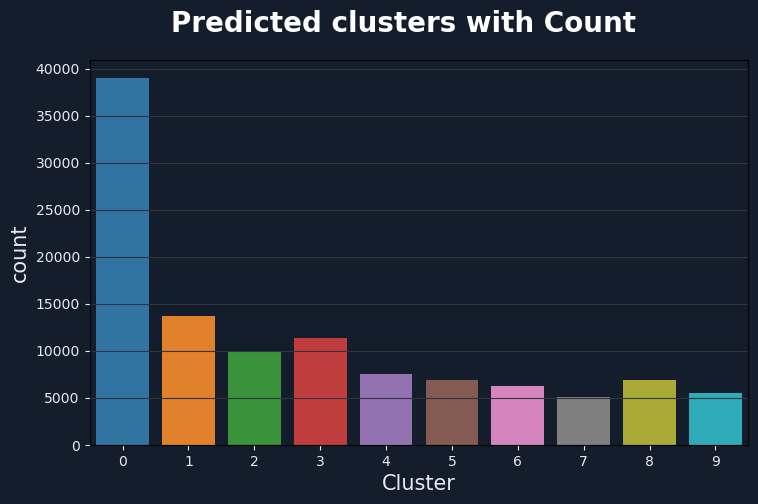

In [93]:
#Gender
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=combinedDf['cluster_predicted'])
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)

#Title 
plt.suptitle('Predicted clusters with Count ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmode count", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

In [94]:
combinedDf.groupby(['cluster_predicted']).size()

cluster_predicted
0    39004
1    13642
2     9941
3    11364
4     7525
5     6878
6     6290
7     5115
8     6866
9     5541
dtype: int64

In [95]:
df_kmode_cluster1 = combinedDf[combinedDf['cluster_predicted']==0]
df_kmode_cluster1.head()


Category Payment_Method  By_St Gender State  Is_Discount  \
0   Mobiles & Tablets        Payaxis  Gross      M    FL        False   
15         Appliances            cod  Gross      M    ND        False   
17         Appliances            cod  Gross      M    ND        False   
18         Appliances        Easypay  Gross      M    HI        False   
20         Appliances        Easypay  Gross      M    HI        False   

     Region age_bin  cluster_predicted  
0     South   19-30                  0  
15  Midwest   45-70                  0  
17  Midwest   45-70                  0  
18     West   30-45                  0  
20     West   30-45                  0

In [96]:
df_kmode_cluster1.tail()

Category Payment_Method  By_St Gender State  Is_Discount  \
112157    Health & Sports            apg  Gross      M    TX        False   
112158  Mobiles & Tablets        Payaxis  Gross      M    OK        False   
112159  Mobiles & Tablets        Payaxis  Gross      M    OK        False   
112160  Mobiles & Tablets    bankalfalah  Gross      M    OK        False   
112163         Superstore    bankalfalah  Gross      F    KY        False   

       Region age_bin  cluster_predicted  
112157  South   30-45                  0  
112158  South   19-30                  0  
112159  South   19-30                  0  
112160  South   19-30                  0  
112163  South   45-70                  0

In [97]:
df_kmode_cluster1.info

<bound method DataFrame.info of                  Category Payment_Method  By_St Gender State  Is_Discount  \
0       Mobiles & Tablets        Payaxis  Gross      M    FL        False   
15             Appliances            cod  Gross      M    ND        False   
17             Appliances            cod  Gross      M    ND        False   
18             Appliances        Easypay  Gross      M    HI        False   
20             Appliances        Easypay  Gross      M    HI        False   
...                   ...            ...    ...    ...   ...          ...   
112157    Health & Sports            apg  Gross      M    TX        False   
112158  Mobiles & Tablets        Payaxis  Gross      M    OK        False   
112159  Mobiles & Tablets        Payaxis  Gross      M    OK        False   
112160  Mobiles & Tablets    bankalfalah  Gross      M    OK        False   
112163         Superstore    bankalfalah  Gross      F    KY        False   

         Region age_bin  cluster_predicted 

In [98]:
cluster_1.groupby("Region").count()

Category  Payment_Method  By_St  Gender  State  Is_Discount  \
Region                                                                   
Midwest        7674            7674   7674    7674   7674         7674   
Northeast      1607            1607   1607    1607   1607         1607   
South          3057            3057   3057    3057   3057         3057   
West           1304            1304   1304    1304   1304         1304   

           age_bin  cluster_predicted  
Region                                 
Midwest       7674               7674  
Northeast     1607               1607  
South         3057               3057  
West          1304               1304

In [99]:
cluster_6.groupby("Region").count()

Category  Payment_Method  By_St  Gender  State  Is_Discount  \
Region                                                                   
Midwest         714             714    714     714    714          714   
Northeast      4236            4236   4236    4236   4236         4236   
South           776             776    776     776    776          776   
West            564             564    564     564    564          564   

           age_bin  cluster_predicted  
Region                                 
Midwest        714                714  
Northeast     4236               4236  
South          776                776  
West           564                564

In [100]:
cluster_3.groupby("Region").count()

Category  Payment_Method  By_St  Gender  State  Is_Discount  \
Region                                                                   
Midwest        1409            1409   1409    1409   1409         1409   
Northeast      7424            7424   7424    7424   7424         7424   
South          1670            1670   1670    1670   1670         1670   
West            861             861    861     861    861          861   

           age_bin  cluster_predicted  
Region                                 
Midwest       1409               1409  
Northeast     7424               7424  
South         1670               1670  
West           861                861

# **K Mean**

# **Data Preparation For Clustering using RFM Values**
We are going to analysis the Customers based on below 3 factors:
1.  R (Recency): Number of days since last purchase 
2.  F (Frequency): Number of tracsactions
3. M (Monetary): Total Monetory of transactions (revenue contributed)

In [101]:
df_cancelled = amazon_sales_df[amazon_sales_df['Status']=='canceled']
df_cancelled.head()

Order_Id Order_Date    Status  Item_Id                        SKU  \
7   100354677 2020-01-10  canceled   574769         GFE_19_USBLEDLight   
8   100354677 2020-01-10  canceled   574770  oasis_Kingston-32GB-DTIG4   
9   100354677 2020-01-10  canceled   574771             Geepas_GSB5420   
12  100403034 2020-12-24  canceled   656937        APPWES59CA4D59CB41A   
13  100403034 2020-12-24  canceled   656938        APPPHI5A09939191938   

    Quantity_Ordered  Price   Value  Discount_Amount       Total  \
7                  2   49.0    98.0          0.00000    98.00000   
8                  2  135.0   270.0          0.00000   270.00000   
9                  2  549.9  1099.8          0.00000  1099.80000   
12                 2  254.8   509.6         39.80628   469.79372   
13                 2  315.5   631.0         49.28917   581.71083   

             Category Payment_Method  By_St  Customer_Id  Year   Month  \
7   Mobiles & Tablets        Payaxis  Gross        42485  2020  Oct-20   
8           Computing        Payaxis  Gross        42485  2020  Oct-20   
9          Appliances        Payaxis  Gross        42485  2020  Oct-20   
12         Appliances        Easypay  Gross        42485  2020  Dec-20   
13         Appliances        Easypay  Gross        42485  2020  Dec-20   

    Ref_Number Name_Prefix First_Name Middle_Initial Last_Name Gender  Age  \
7       171143       Prof.        Lee              S     Eaker      M   28   
8       171143       Prof.        Lee              S     Eaker      M   28   
9       171143       Prof.        Lee              S     Eaker      M   28   
12      171143       Prof.        Lee              S     Eaker      M   28   
13      171143       Prof.        Lee              S     Eaker      M   28   

     Full_Name                Email Signed_Date  Phone_Number Place_Name  \
7   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
8   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
9   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
12  Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
13  Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   

      County    City State  Zip_Code Region User_Name  Discount_Percent  \
7   Bradford  Graham    FL     32042  South   lseaker          0.000000   
8   Bradford  Graham    FL     32042  South   lseaker          0.000000   
9   Bradford  Graham    FL     32042  South   lseaker          0.000000   
12  Bradford  Graham    FL     32042  South   lseaker         15.622559   
13  Bradford  Graham    FL     32042  South   lseaker         15.622558   

    Is_Discount  
7         False  
8         False  
9         False  
12         True  
13         True

In [102]:
# Droping rows having missing values

df = df_cancelled.dropna()
df.shape

(112166, 36)

In [103]:
# New Attribute : Monetary

rfm_m = df.groupby('Customer_Id')['Total'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

Customer_Id       Total
0            4   15735.940
1           16   27975.799
2           20   10445.918
3           28    7516.600
4           32  132002.450

In [104]:
# New Attribute : Frequency

rfm_f = df.groupby('Customer_Id')['Ref_Number'].count()

rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Customer_Id', 'Frequency']
rfm_f.head(20)

Customer_Id  Frequency
0             4          6
1            16         20
2            20          4
3            28          1
4            32         65
5            33         23
6            44          5
7            47         18
8            54         26
9            56         33
10           58          2
11           64         44
12           71         21
13           75          3
14           79          1
15           81          7
16           85          3
17           88          1
18           93          2
19           98          4

In [105]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='Customer_Id', how='inner')
rfm.head()

Customer_Id       Total  Frequency
0            4   15735.940          6
1           16   27975.799         20
2           20   10445.918          4
3           28    7516.600          1
4           32  132002.450         65

In [106]:
# Compute the maximum date to know the last transaction date

max_date = max(df['Order_Date'])
max_date

Timestamp('2021-12-09 00:00:00')

In [107]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['Order_Date']
df.head()

Order_Id Order_Date    Status  Item_Id                        SKU  \
7   100354677 2020-01-10  canceled   574769         GFE_19_USBLEDLight   
8   100354677 2020-01-10  canceled   574770  oasis_Kingston-32GB-DTIG4   
9   100354677 2020-01-10  canceled   574771             Geepas_GSB5420   
12  100403034 2020-12-24  canceled   656937        APPWES59CA4D59CB41A   
13  100403034 2020-12-24  canceled   656938        APPPHI5A09939191938   

    Quantity_Ordered  Price   Value  Discount_Amount       Total  \
7                  2   49.0    98.0          0.00000    98.00000   
8                  2  135.0   270.0          0.00000   270.00000   
9                  2  549.9  1099.8          0.00000  1099.80000   
12                 2  254.8   509.6         39.80628   469.79372   
13                 2  315.5   631.0         49.28917   581.71083   

             Category Payment_Method  By_St  Customer_Id  Year   Month  \
7   Mobiles & Tablets        Payaxis  Gross        42485  2020  Oct-20   
8           Computing        Payaxis  Gross        42485  2020  Oct-20   
9          Appliances        Payaxis  Gross        42485  2020  Oct-20   
12         Appliances        Easypay  Gross        42485  2020  Dec-20   
13         Appliances        Easypay  Gross        42485  2020  Dec-20   

    Ref_Number Name_Prefix First_Name Middle_Initial Last_Name Gender  Age  \
7       171143       Prof.        Lee              S     Eaker      M   28   
8       171143       Prof.        Lee              S     Eaker      M   28   
9       171143       Prof.        Lee              S     Eaker      M   28   
12      171143       Prof.        Lee              S     Eaker      M   28   
13      171143       Prof.        Lee              S     Eaker      M   28   

     Full_Name                Email Signed_Date  Phone_Number Place_Name  \
7   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
8   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
9   Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
12  Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   
13  Eaker, Lee  lee.eaker@gmail.com  1981-02-04  239-335-6755     Graham   

      County    City State  Zip_Code Region User_Name  Discount_Percent  \
7   Bradford  Graham    FL     32042  South   lseaker          0.000000   
8   Bradford  Graham    FL     32042  South   lseaker          0.000000   
9   Bradford  Graham    FL     32042  South   lseaker          0.000000   
12  Bradford  Graham    FL     32042  South   lseaker         15.622559   
13  Bradford  Graham    FL     32042  South   lseaker         15.622558   

    Is_Discount     Diff  
7         False 699 days  
8         False 699 days  
9         False 699 days  
12         True 350 days  
13         True 350 days

In [108]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('Customer_Id')['Diff'].min()

rfm_p = rfm_p.reset_index()
rfm_p.head()

Customer_Id     Diff
0            4  84 days
1           16 363 days
2           20  73 days
3           28 361 days
4           32  61 days

In [109]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

Customer_Id  Diff
0            4    84
1           16   363
2           20    73
3           28   361
4           32    61

In [110]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='Customer_Id', how='inner')
rfm_WO=pd.merge(rfm, rfm_p, on='Customer_Id', how='inner')
rfm.columns = ['Customer_Id', 'Monetory', 'Frequency', 'Recency']
rfm.head()

Customer_Id    Monetory  Frequency  Recency
0            4   15735.940          6       84
1           16   27975.799         20      363
2           20   10445.918          4       73
3           28    7516.600          1      361
4           32  132002.450         65       61

Text(0.5, 0, 'Attributes')

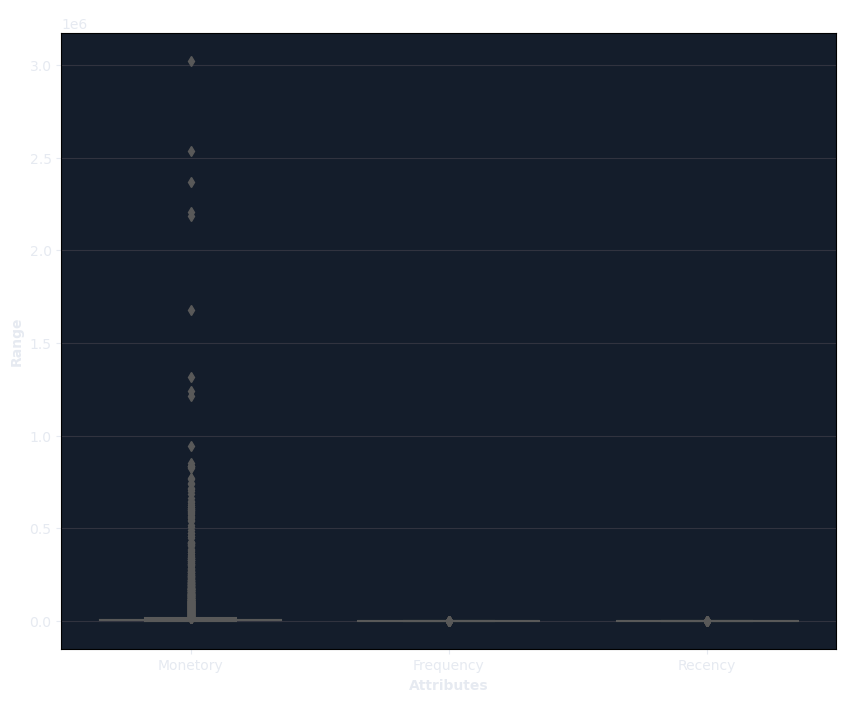

In [111]:
# Outlier Analysis of Monetory Frequency and Recency

attributes = ['Monetory','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [112]:
# Removing (statistical) outliers for Monetory
P1 = rfm.Monetory.quantile(0.05)
P2 = rfm.Monetory.quantile(0.95)
P_Range = P2 - P1
rfm = rfm[(rfm.Monetory >= P1 - 1.5*P_Range) & (rfm.Monetory <= P2 + 1.5*P_Range)]

# Removing (statistical) outliers for Recency
P1 = rfm.Recency.quantile(0.05)
P2 = rfm.Recency.quantile(0.95)
P_Range = P2 - P1
rfm = rfm[(rfm.Recency >= P1 - 1.5*P_Range) & (rfm.Recency <= P2 + 1.5*P_Range)]

# Removing (statistical) outliers for Frequency
P1 = rfm.Frequency.quantile(0.05)
P2 = rfm.Frequency.quantile(0.95)
P_Range = P2 - P1
rfm = rfm[(rfm.Frequency >= P1 - 1.5*P_Range) & (rfm.Frequency <= P2 + 1.5*P_Range)]

In [113]:
# Rescaling the attributes
# import required libraries for clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

rfm_df = rfm[['Monetory', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(29915, 3)

In [114]:
rfm_df.head()

Monetory  Frequency  Recency
0  15735.940          6       84
1  27975.799         20      363
2  10445.918          4       73
3   7516.600          1      361
5  33604.544         23       37

In [115]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetory', 'Frequency', 'Recency']

rfm_df_scaled.head()

Monetory  Frequency   Recency
0  1.142642   1.045140 -1.591892
1  2.474239   5.612713  1.020429
2  0.567131   0.392630 -1.694887
3  0.248445  -0.586136  1.001702
4  3.086600   6.591479 -2.031961

In [116]:
rfm_df.head()

Monetory  Frequency  Recency
0  15735.940          6       84
1  27975.799         20      363
2  10445.918          4       73
3   7516.600          1      361
5  33604.544         23       37

In [117]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm_df)
x_scaled = scaler.fit_transform(rfm_df)
x_scaled

array([[ 1.14264207,  1.04514002, -1.59189243],
       [ 2.47423851,  5.61271305,  1.02042867],
       [ 0.56713099,  0.39262959, -1.69488717],
       ...,
       [-0.53671621, -0.25988085, -1.72297665],
       [ 2.259266  , -0.58613606, -1.72297665],
       [-0.54649659, -0.58613606, -1.72297665]])

In [120]:
import warnings
warnings.filterwarnings('ignore')

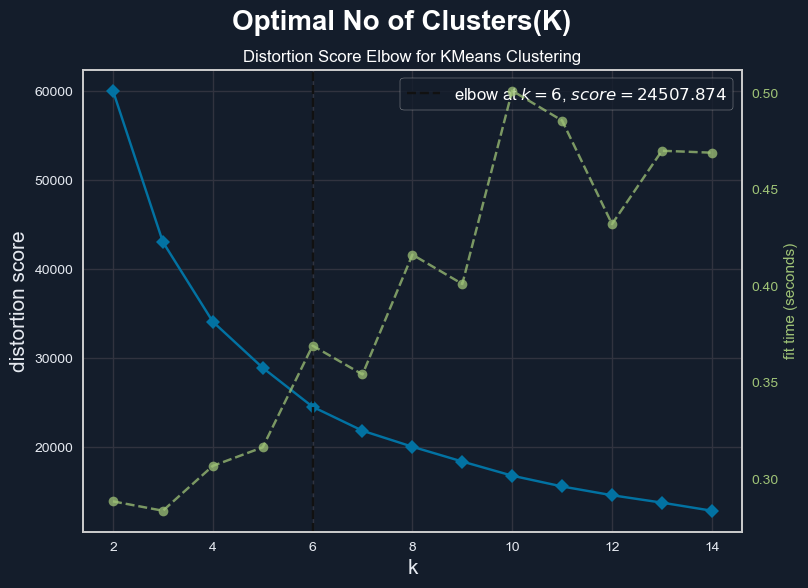

In [126]:
#plt.style.use('default')

plt.figure(figsize = (8.5,6), facecolor='#141d2b')
plt.rcParams['axes.facecolor'] = '#141d2b'
plt.suptitle('Optimal No of Clusters(K)', fontsize=20,fontweight="bold")
plt.xlabel("K", fontsize = 15)
plt.ylabel("Disortion Score", fontsize = 15)
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = '#e6eaf1'
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(x_scaled)
visualizer.show(outpath="cancel_df/kmean_k1.png")

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# # Initialize the KMeans model and fit it to the scaled dataset
# kmeans = KMeans(init='k-means++', n_init=10, random_state=42)
# kmeans.fit(x_scaled)

# # Calculate the sum of squared distances for each number of clusters
# sse = []
# for k in range(1, 15):
#     kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
#     kmeans.fit(x_scaled)
#     sse.append(kmeans.inertia_)

# # Plot the elbow graph
# plt.plot(range(1, 15), sse, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Sum of squared distances')
# plt.title('Elbow Method')
# plt.show()



In [128]:
kmeans_scaled = KMeans(6)
kmeans_scaled.fit(x_scaled)


KMeans(n_clusters=6)

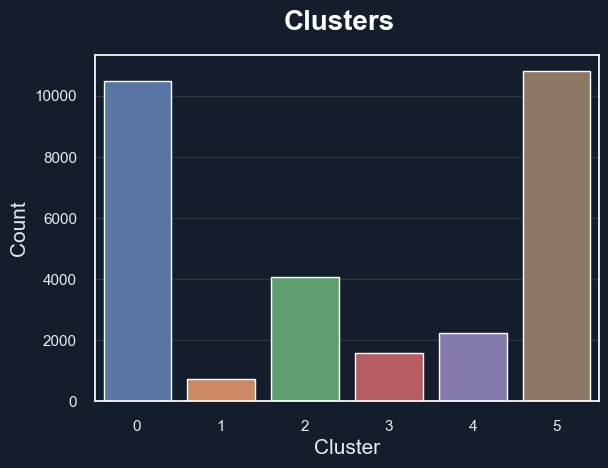

In [131]:
identified_clusters = kmeans_scaled.fit_predict(rfm_df)
clusters_scaled = rfm_df.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

#plot panel facecolor
plt.figure(figsize = (6.5,4.5),facecolor='#141d2b')
sns.countplot(x="cluster_pred", data=clusters_scaled)
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('Clusters', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

#save plot
plt.savefig("cancel_df/k_mean_bar", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

[3 1 3 ... 5 1 5]
 Our cluster centers are as follows
[[-0.27374035 -0.30145965  1.00026366]
 [-0.17927794 -0.14334971 -1.57371662]
 [ 1.65922676  0.4407848  -0.05292781]
 [-0.33944404 -0.3213501  -0.27285223]
 [ 0.14798323  2.85791995 -0.28287697]
 [ 4.6146554   2.34429461 -0.76806402]]


Monetory  Frequency  Recency
cluster_pred                              
0                10487      10487    10487
1                 4082       4082     4082
2                 2234       2234     2234
3                10800      10800    10800
4                 1589       1589     1589
5                  723        723      723

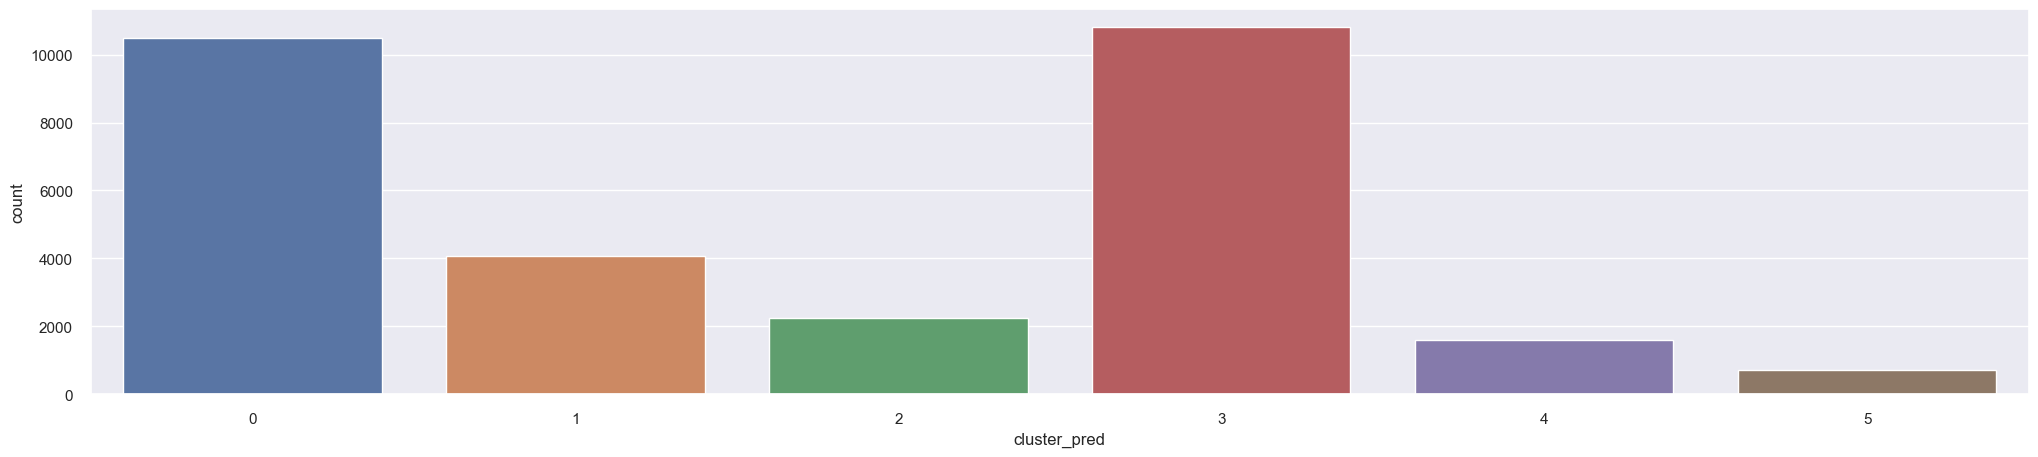

In [129]:
identified_clusters = kmeans_scaled.fit_predict(rfm_df)
clusters_scaled = rfm_df.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

In [132]:
clusters_scaled.head()

Monetory  Frequency  Recency  cluster_pred
0  15735.940          6       84             4
1  27975.799         20      363             3
2  10445.918          4       73             2
3   7516.600          1      361             0
5  33604.544         23       37             1

Text(0.5, 0, 'Monetory')

<Figure size 800x550 with 0 Axes>

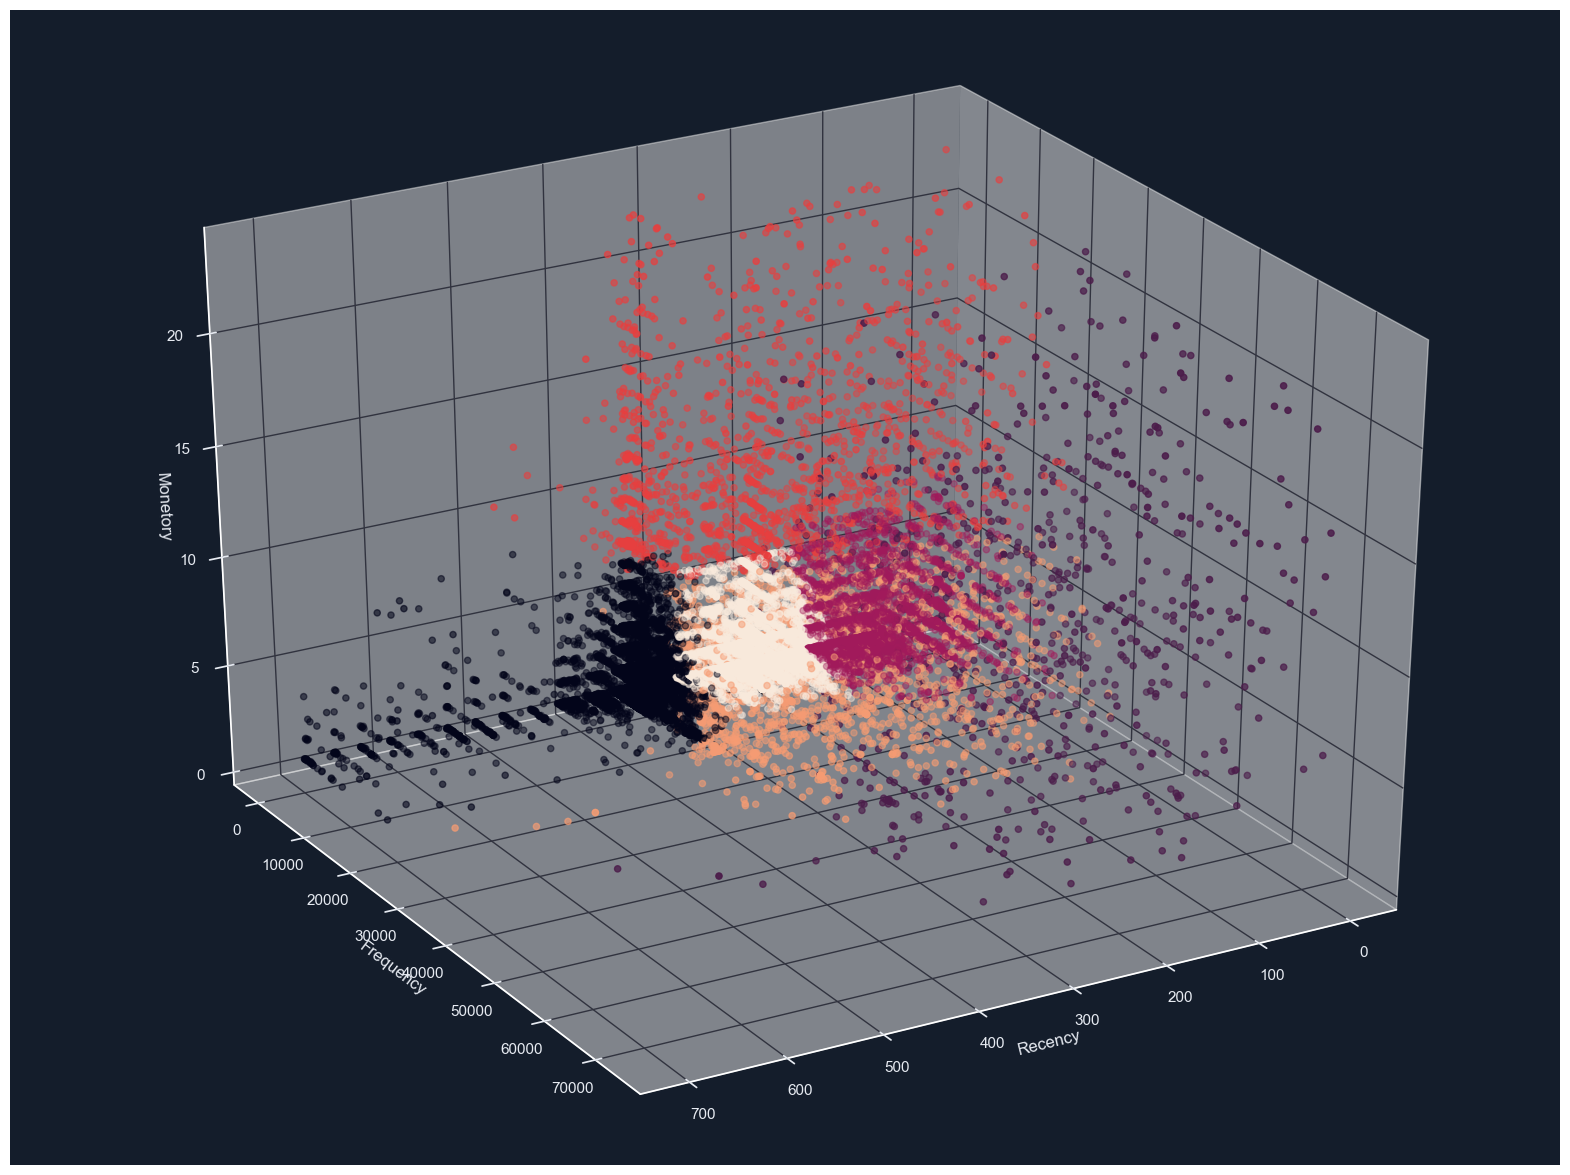

In [133]:
fig = plt.figure()
plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetory']
ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')


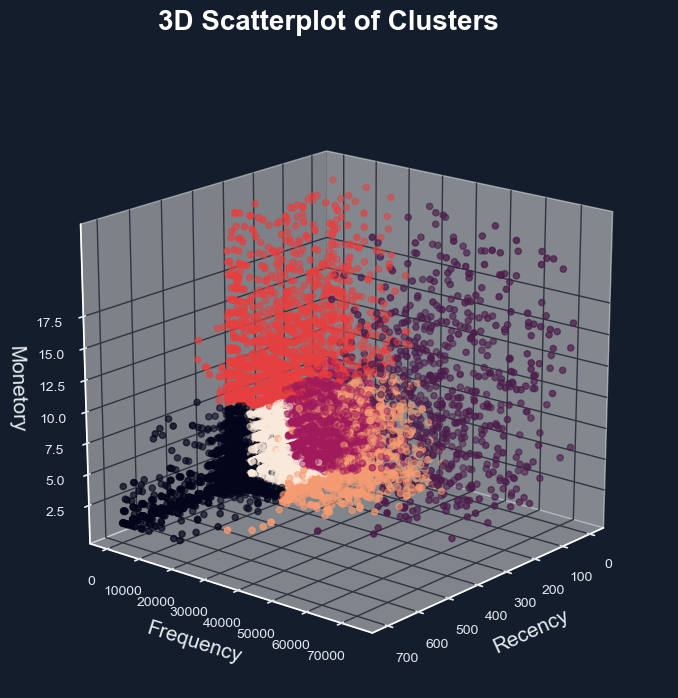

In [134]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d
#plot panel facecolor
plt.figure(figsize = (8.5,7.8),facecolor='#141d2b')

ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetory']
ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(20, 40)
ax.set_xlabel('Recency',fontsize = 15,labelpad=10)
ax.set_ylabel('Frequency',fontsize = 15,labelpad=10)
ax.set_zlabel('Monetory',fontsize = 15,labelpad=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('3D Scatterplot of Clusters', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Ticks
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
ax.set_zticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5])
# change fontsize
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
#save plot
plt.savefig("cancel_df/k_3d", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [135]:
rfm_dff = rfm_df.copy()
rfm_dff['cluster']= clusters_scaled['cluster_pred']


rfm_dff.groupby('cluster').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetory' : ['mean','min','max','count']
})

Recency            Frequency              Monetory            \
               mean  min  max       mean min max          mean       min   
cluster                                                                    
0        360.849366  290  699   1.872342   1   9   2714.677677      0.00   
1        171.986169    0  638   9.982019   1  23  47650.228964  26133.08   
2         85.898284    0  175   2.355392   1   8   3584.254950      0.00   
3        223.804909    0  547  11.556325   7  23   6593.167060      0.00   
4        248.404389    0  698   4.146888   1  11  20468.838275   7739.96   
5        224.871216  147  294   1.811869   1   6   2111.874222      0.00   

                           
               max  count  
cluster                    
0        23790.000  10489  
1        73336.176    723  
2        23873.700   4080  
3        31718.347   1589  
4        45900.000   2233  
5        13799.800  10801

In [136]:
rfm_dff.groupby(['cluster']).size()

cluster
0    10489
1      723
2     4080
3     1589
4     2233
5    10801
dtype: int64

In [137]:
rfm_dff.head()

Monetory  Frequency  Recency  cluster
0  15735.940          6       84        4
1  27975.799         20      363        3
2  10445.918          4       73        2
3   7516.600          1      361        0
5  33604.544         23       37        1

In [138]:
rfm_df_KmeanClusters = rfm_dff.copy()

In [139]:
kmean_df=rfm.copy()

In [140]:
kmean_df['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

In [141]:
kmean_df.head()

Customer_Id   Monetory  Frequency  Recency  cluster_pred
0            4  15735.940          6       84             1
1           16  27975.799         20      363             4
2           20  10445.918          4       73             5
3           28   7516.600          1      361             2
5           33  33604.544         23       37             3

#### Predicted cluster with whole dataset

In [142]:
merged_kmean_df = pd.merge(kmean_df, df_cancelled, on="Customer_Id")
merged_kmean_df.head()

Customer_Id  Monetory  Frequency  Recency  cluster_pred   Order_Id  \
0            4  15735.94          6       84             1  100385913   
1            4  15735.94          6       84             1  100385965   
2            4  15735.94          6       84             1  100385995   
3            4  15735.94          6       84             1  100386207   
4            4  15735.94          6       84             1  100559042   

  Order_Date    Status  Item_Id                  SKU  Quantity_Ordered  \
0 2020-12-20  canceled   626356  APPDAW59FF034995959                 2   
1 2020-12-20  canceled   626502  APPDAW59FF034995959                 2   
2 2020-12-20  canceled   626546  APPDAW59FF034995959                 2   
3 2020-12-20  canceled   626946  APPDAW59FF034995959                 2   
4 2021-09-16  canceled   899705  MATHUA5AF70A7D1E50A                 1   

    Price   Value  Discount_Amount    Total           Category  \
0  1108.2  2216.4           173.82  2042.58         Appliances   
1  1108.2  2216.4           173.82  2042.58         Appliances   
2  1108.2  2216.4           173.82  2042.58         Appliances   
3  1108.2  2216.4             0.00  2216.40         Appliances   
4  3695.9  3695.9             0.00  3695.90  Mobiles & Tablets   

    Payment_Method  By_St  Year   Month  Ref_Number Name_Prefix First_Name  \
0       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
1       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
2       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
3  easypay_voucher  Gross  2020  Dec-20      690850         Mr.     Reggie   
4       jazzwallet  Gross  2021  Sep-21      690850         Mr.     Reggie   

  Middle_Initial Last_Name Gender  Age        Full_Name  \
0              C   Doughty      M   33  Doughty, Reggie   
1              C   Doughty      M   33  Doughty, Reggie   
2              C   Doughty      M   33  Doughty, Reggie   
3              C   Doughty      M   33  Doughty, Reggie   
4              C   Doughty      M   33  Doughty, Reggie   

                      Email Signed_Date  Phone_Number   Place_Name  County  \
0  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
1  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
2  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
3  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
4  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   

          City State  Zip_Code   Region  User_Name  Discount_Percent  \
0  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
1  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
2  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
3  Springfield    MO     65809  Midwest  rcdoughty          0.000000   
4  Springfield    MO     65809  Midwest  rcdoughty          4.058551   

   Is_Discount  
0         True  
1         True  
2         True  
3        False  
4        False

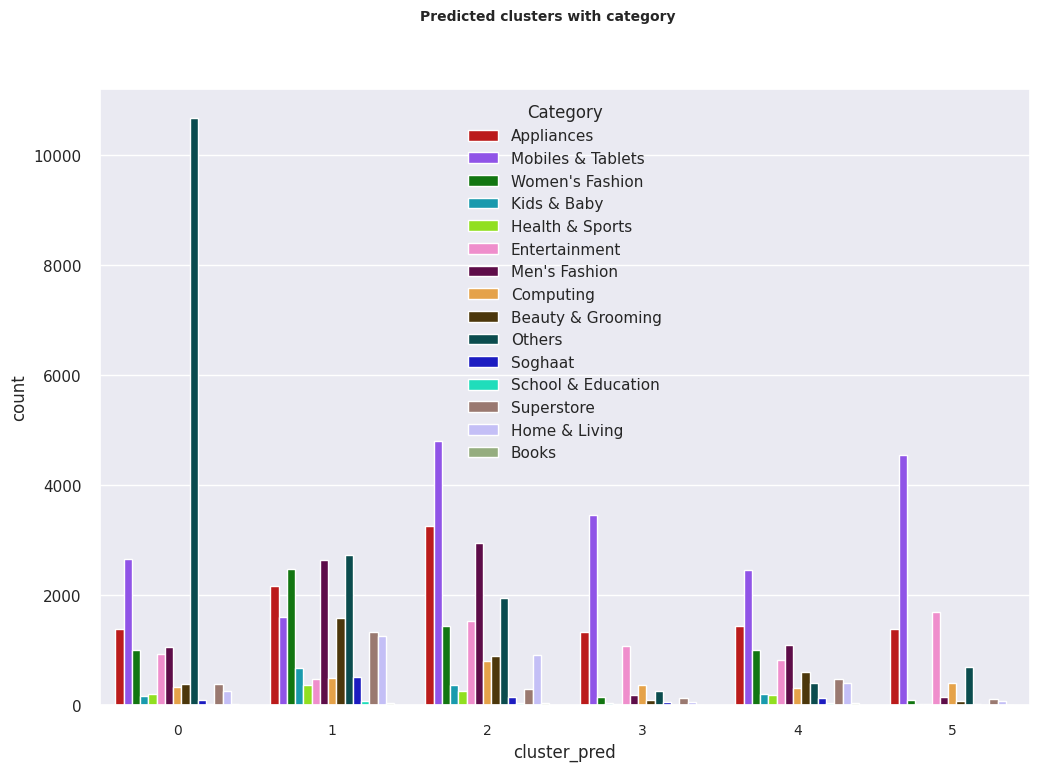

In [ ]:
#category
import colorcet as cc
plt.figure(figsize = (12,8))
custom_palette = sns.color_palette(cc.glasbey, n_colors=25)
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Category'],palette=custom_palette)

plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with category ', fontsize=10,fontweight="bold")
plt.show()

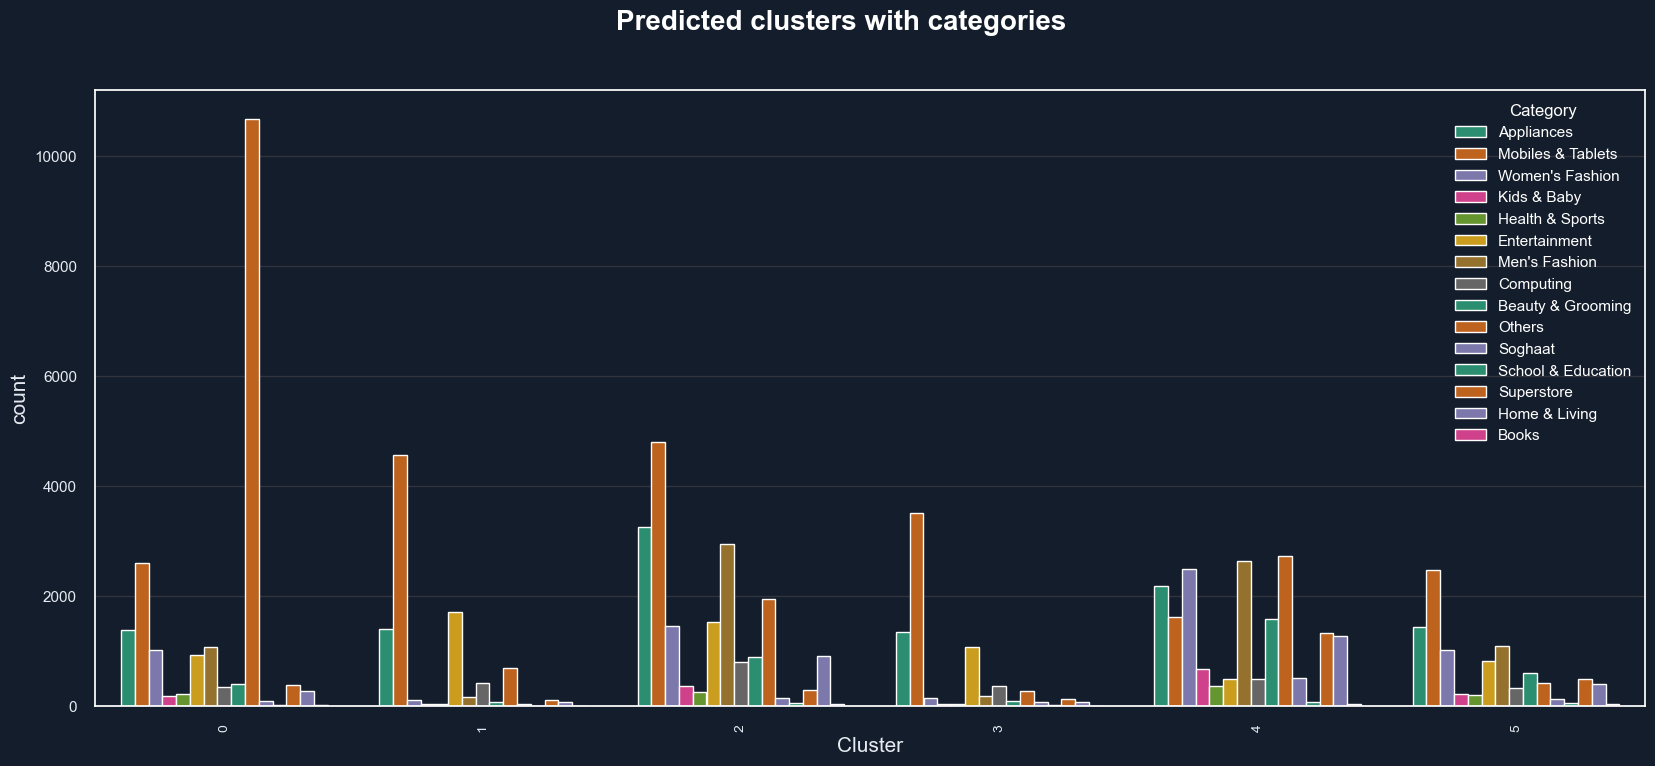

In [201]:
#category
plt.figure(figsize = (20,8),facecolor='#141d2b')
qualitative_colors = sns.color_palette("Dark2", 11)
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Category'],palette=qualitative_colors)
plt.xticks(rotation=90,fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'


#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with categories ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmean category", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)



plt.show()

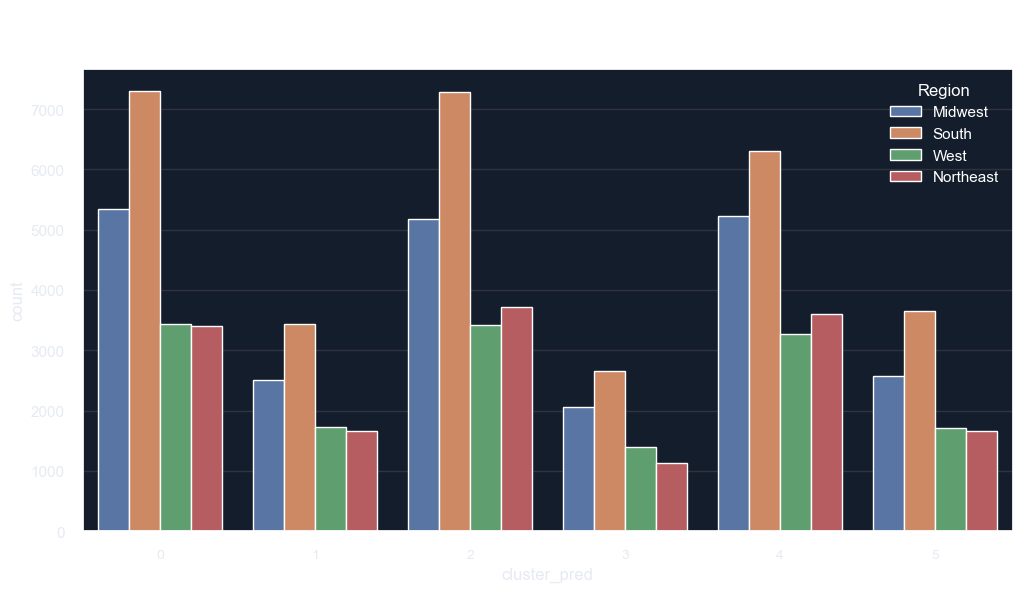

In [144]:
#Region
plt.figure(figsize = (12,6))
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Region'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=10,fontweight="bold")
plt.show()

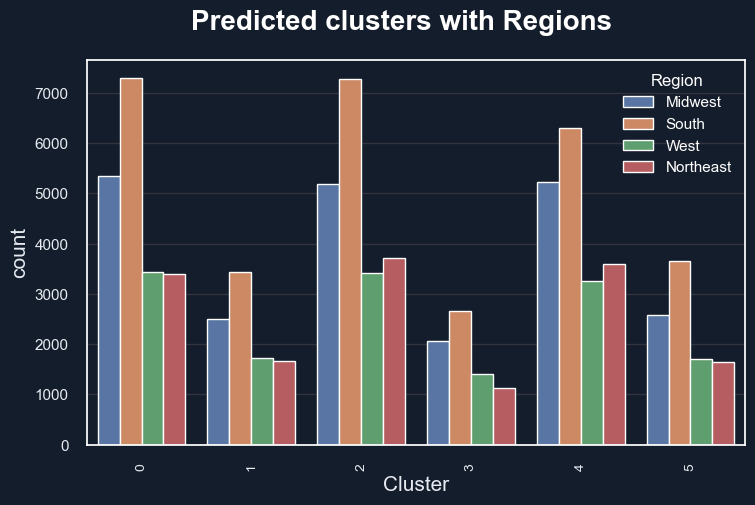

In [202]:
#category
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=merged_kmean_df['cluster_pred'],order=merged_kmean_df['cluster_pred'].value_counts().sort_index(ascending=True).index,hue=merged_kmean_df['Region'])
plt.xticks(rotation=90,fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with Regions ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmean Region", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)


plt.show()

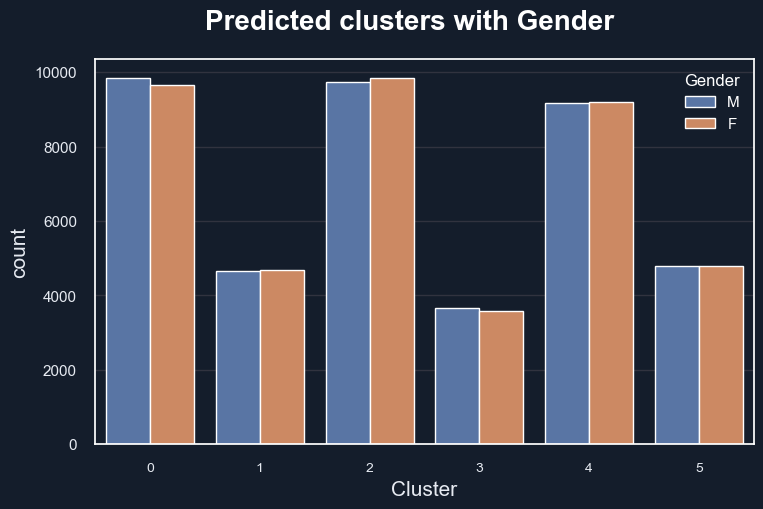

In [203]:
#category
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=merged_kmean_df['cluster_pred'],hue=merged_kmean_df['Gender'])
plt.xticks(fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/kmean gender", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)





plt.show()

In [153]:
rfm_df_KmeanClusters = rfm_dff.copy()

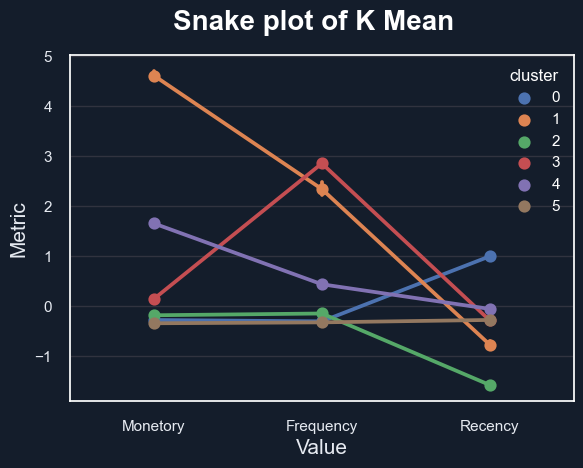

In [154]:
#plot panel facecolor
plt.figure(figsize = (6.5,4.5),facecolor='#141d2b')

#Snake-plot curve for the 6 clusters
df  = rfm_df_KmeanClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_KmeanClusters['cluster']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')




#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('Snake plot of K Mean', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Value", fontsize = 15)
plt.ylabel("Metric", fontsize = 15)

#save plot
plt.savefig("cancel_df/k_mean_snake", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

<Axes: xlabel='Metric', ylabel='Value'>

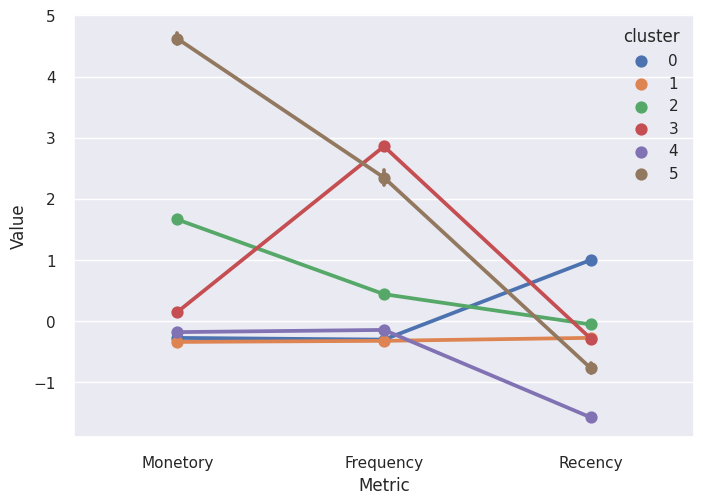

In [ ]:
#Snake-plot curve for the 6 clusters
df  = rfm_df_KmeanClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_KmeanClusters['cluster']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

# **AGGLOMERATIVE CLUSTERING**

In [155]:
rfm_df.tail()

Monetory  Frequency  Recency
30664    4590.0          1       70
30665    5220.0          3       70
30666     299.5          2       70
30667   25999.8          1       70
30668     209.6          1       70

In [156]:
rfm_df.head()

Monetory  Frequency  Recency
0  15735.940          6       84
1  27975.799         20      363
2  10445.918          4       73
3   7516.600          1      361
5  33604.544         23       37

In [ ]:
# import numpy as np
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram



# # Define range of clusters to test
# n_clusters_range = range(2, 11)

# # Create an empty list to store the silhouette scores for each cluster
# silhouette_scores = []

# # Loop over the range of clusters to test
# for n_clusters in n_clusters_range:
#     # Initialize the agglomerative clustering model
#     model = AgglomerativeClustering(n_clusters=n_clusters)
#     # Fit the model to the data
#     model.fit(rfm_df)
#     # Calculate the silhouette score for the clustering solution
#     score = silhouette_score(rfm_df, model.labels_)
#     # Append the score to the list of silhouette scores
#     silhouette_scores.append(score)

# # Plot the silhouette scores as a function of the number of clusters
# plt.plot(n_clusters_range, silhouette_scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

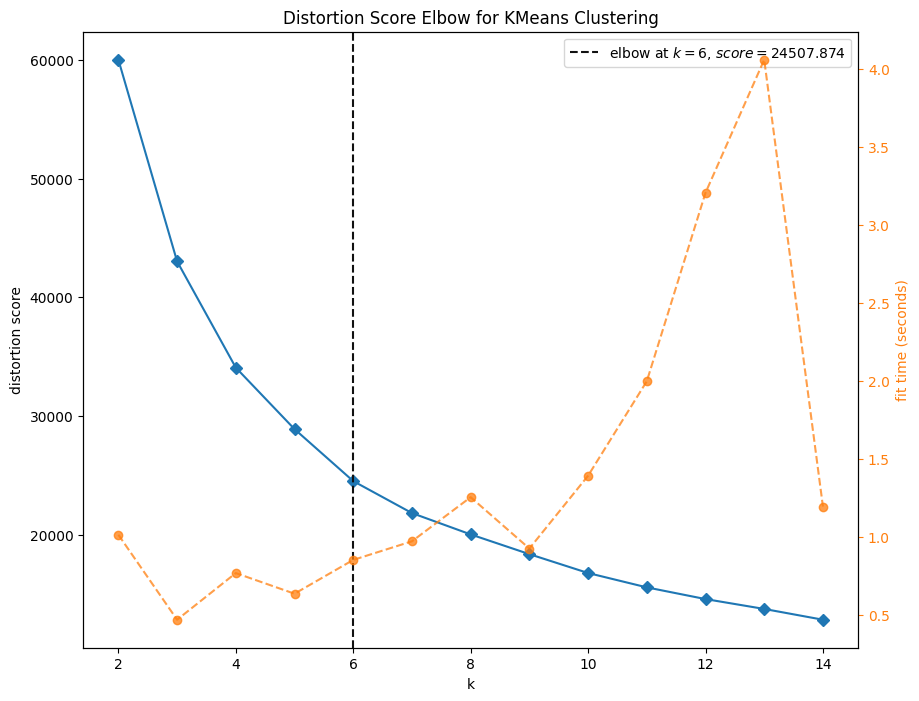

In [ ]:
plt.style.use('default')
plt.figure(figsize = (10,8))
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(x_scaled)
visualizer.show()
plt.show()

In [158]:
# building agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=6, compute_distances=True).fit(rfm_df[['Recency','Frequency','Monetory']])

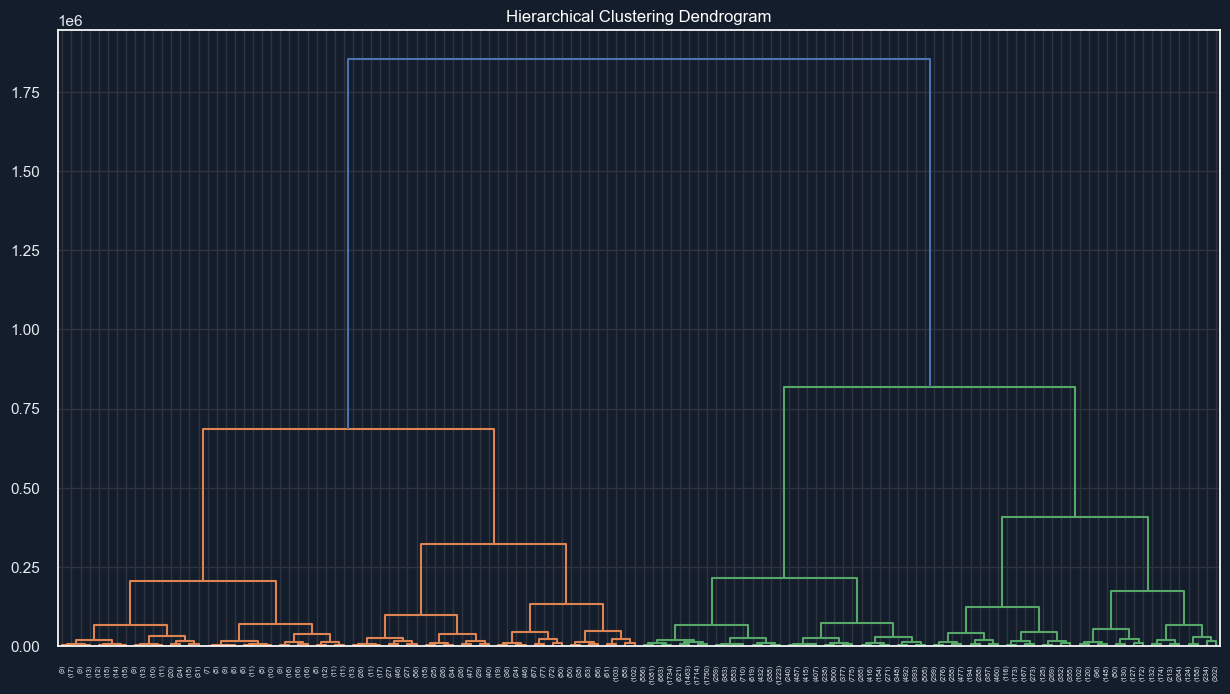

In [161]:
# importing dendrogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(agglo, **kwargs):
  counts = np.zeros(agglo.children_.shape[0])
  n_samples = len(agglo.labels_)
  for i, merge in enumerate(agglo.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]
      counts[i] = current_count
  linkage_matrix = np.column_stack([agglo.children_, agglo.distances_,counts]).astype(float)
  dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(15,8),facecolor='#141d2b')
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=6)
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
# plt.suptitle('Snake plot of K Mean', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'
plt.savefig("cancel_df/agg_dend", facecolor='#141d2b', bbox_inches="tight",format='png',
            pad_inches=0.3, transparent=True)
plt.show()


In [ ]:
# Create a dendrogram to visualize the clustering solution
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
model2= AgglomerativeClustering(n_clusters=6)
model2.fit(rfm_df)

# Creating Dendrogram for our data
# Z = linkage matrix
Z = hierarchy.linkage(rfm_df, method='average')
  
plt.figure(figsize=(20,15))
plt.title("Dendrograms")
  
# Dendrogram plotting using linkage matrix
dendrogram = hierarchy.dendrogram(Z)


# dendrogram = dendrogram(model2)
# plt.show()

KeyboardInterrupt: ignored

**ward method**

In [162]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=6)
agglomerative_clusters = agglo_model.fit_predict(x_scaled)
agglomerative_clusters

array([4, 1, 4, ..., 5, 4, 5], dtype=int64)

In [163]:
rfm_df_AggClusters= rfm_df.copy()

In [164]:
rfm_df_AggClusters["agglomerative_clusters"] = agglomerative_clusters

In [165]:
rfm_df_AggClusters.head()

Monetory  Frequency  Recency  agglomerative_clusters
0  15735.940          6       84                       4
1  27975.799         20      363                       1
2  10445.918          4       73                       4
3   7516.600          1      361                       2
5  33604.544         23       37                       0

<Figure size 800x550 with 0 Axes>

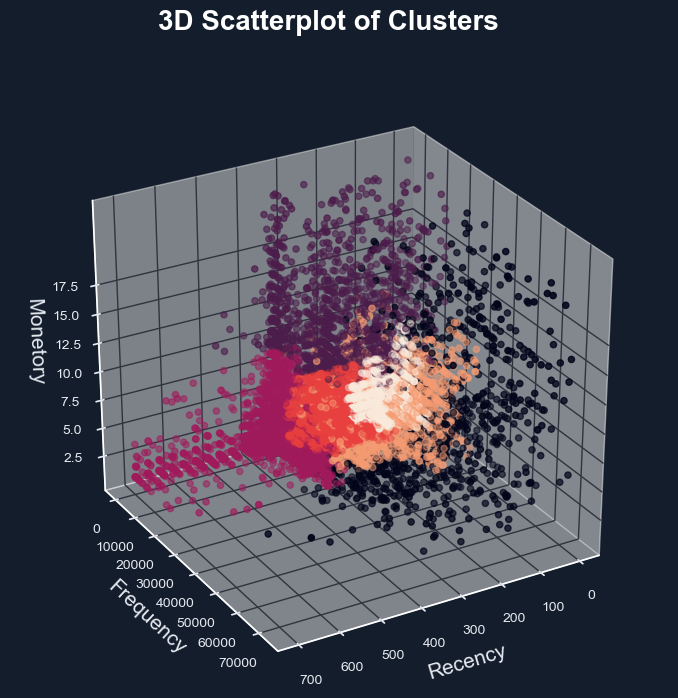

In [167]:
fig = plt.figure()
plt.figure(figsize=(8.5,7.8),facecolor='#141d2b')
ax = plt.axes(projection='3d')
xline=rfm_df_AggClusters['Recency']
yline=rfm_df_AggClusters['Frequency']
zline=rfm_df_AggClusters['Monetory']

ax.scatter3D(xline, zline,yline,c=rfm_df_AggClusters['agglomerative_clusters'])
ax.view_init(30, 60)
ax.set_xlabel('Recency',fontsize = 15,labelpad=10)
ax.set_ylabel('Frequency',fontsize = 15,labelpad=10)
ax.set_zlabel('Monetory',fontsize = 15,labelpad=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('3D Scatterplot of Clusters', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Ticks
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
ax.set_zticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5])
# change fontsize
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
#save plot
plt.savefig("cancel_df/agg_3d", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

#### Prdeicted clusters with df

In [168]:
Agglo_df=rfm.copy()

In [174]:
Agglo_df['cluster_pred']=agglomerative_clusters
merged_agglo_df = pd.merge(Agglo_df, df_cancelled, on="Customer_Id")
merged_agglo_df.head()

Customer_Id  Monetory  Frequency  Recency  cluster_pred   Order_Id  \
0            4  15735.94          6       84             4  100385913   
1            4  15735.94          6       84             4  100385965   
2            4  15735.94          6       84             4  100385995   
3            4  15735.94          6       84             4  100386207   
4            4  15735.94          6       84             4  100559042   

  Order_Date    Status  Item_Id                  SKU  Quantity_Ordered  \
0 2020-12-20  canceled   626356  APPDAW59FF034995959                 2   
1 2020-12-20  canceled   626502  APPDAW59FF034995959                 2   
2 2020-12-20  canceled   626546  APPDAW59FF034995959                 2   
3 2020-12-20  canceled   626946  APPDAW59FF034995959                 2   
4 2021-09-16  canceled   899705  MATHUA5AF70A7D1E50A                 1   

    Price   Value  Discount_Amount    Total           Category  \
0  1108.2  2216.4           173.82  2042.58         Appliances   
1  1108.2  2216.4           173.82  2042.58         Appliances   
2  1108.2  2216.4           173.82  2042.58         Appliances   
3  1108.2  2216.4             0.00  2216.40         Appliances   
4  3695.9  3695.9             0.00  3695.90  Mobiles & Tablets   

    Payment_Method  By_St  Year   Month  Ref_Number Name_Prefix First_Name  \
0       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
1       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
2       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
3  easypay_voucher  Gross  2020  Dec-20      690850         Mr.     Reggie   
4       jazzwallet  Gross  2021  Sep-21      690850         Mr.     Reggie   

  Middle_Initial Last_Name Gender  Age        Full_Name  \
0              C   Doughty      M   33  Doughty, Reggie   
1              C   Doughty      M   33  Doughty, Reggie   
2              C   Doughty      M   33  Doughty, Reggie   
3              C   Doughty      M   33  Doughty, Reggie   
4              C   Doughty      M   33  Doughty, Reggie   

                      Email Signed_Date  Phone_Number   Place_Name  County  \
0  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
1  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
2  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
3  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
4  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   

          City State  Zip_Code   Region  User_Name  Discount_Percent  \
0  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
1  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
2  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
3  Springfield    MO     65809  Midwest  rcdoughty          0.000000   
4  Springfield    MO     65809  Midwest  rcdoughty          4.058551   

   Is_Discount  
0         True  
1         True  
2         True  
3        False  
4        False

In [175]:
#category
import colorcet as cc
plt.figure(figsize = (12,6))
custom_palette = sns.color_palette(cc.glasbey, n_colors=25)
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().index,hue=merged_agglo_df['Category'],palette=custom_palette)
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Category ', fontsize=10,fontweight="bold")
plt.show()



ModuleNotFoundError: No module named 'colorcet'

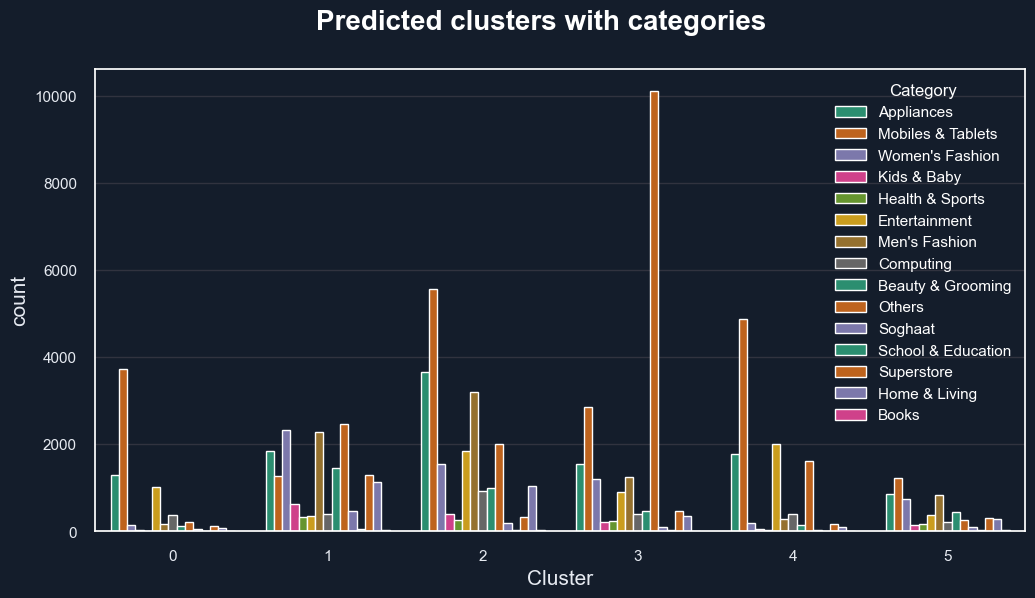

In [207]:
#category
plt.figure(figsize = (12,6),facecolor='#141d2b')

qualitative_colors = sns.color_palette("Dark2", 11)
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().sort_index().index,hue=merged_agglo_df['Category'],palette=
qualitative_colors)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with categories ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/agg_category", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)





plt.show()

In [172]:
#Region
plt.figure(figsize = (12,6))
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().index,hue=merged_agglo_df['Region'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=10,fontweight="bold")
plt.show()

NameError: name 'merged_agglo_df' is not defined

<Figure size 1200x600 with 0 Axes>

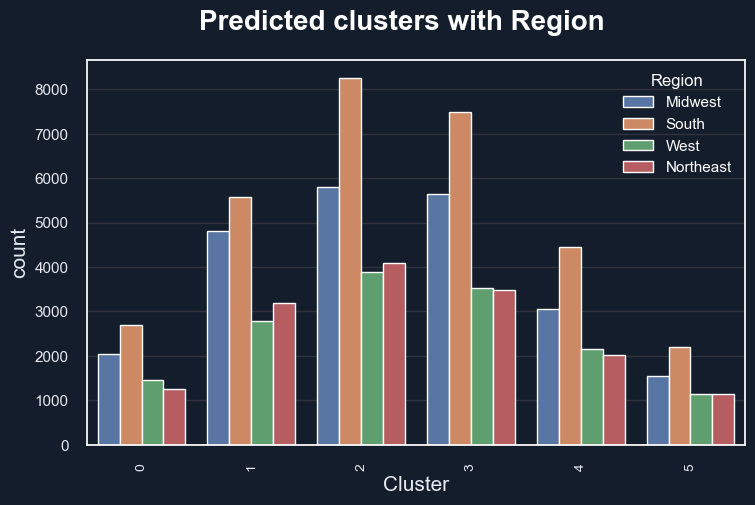

In [208]:
#Region
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().sort_index().index,hue=merged_agglo_df['Region'])
plt.xticks(rotation=90,fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/agg_region", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)





plt.show()

In [ ]:
#Gender
plt.figure(figsize = (12,6))
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().index,hue=merged_agglo_df['Gender'])
plt.xticks(fontsize=10)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=10,fontweight="bold")
plt.show()

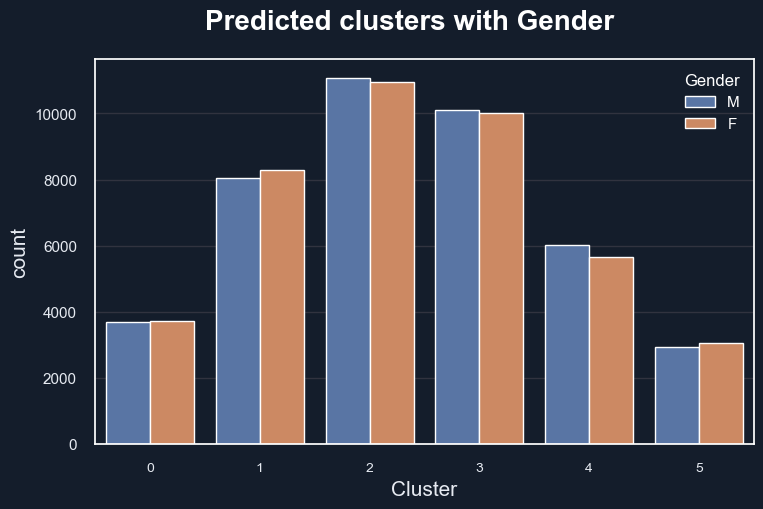

In [209]:
#Gender
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=merged_agglo_df['cluster_pred'],order=merged_agglo_df['cluster_pred'].value_counts().sort_index().index,hue=merged_agglo_df['Gender'])
plt.xticks(fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/agg_gender", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

In [179]:
rfm_df_AggClusters.groupby('agglomerative_clusters').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetory' : ['mean','min','max','count']
})

Recency            Frequency              Monetory  \
                              mean  min  max       mean min max          mean   
agglomerative_clusters                                                          
0                       197.721186    0  638   8.152580   1  23  44697.052050   
1                       197.953147    0  547  11.431469   6  23   5714.448259   
2                       361.641130  263  699   2.034059   1  10   3455.645714   
3                       222.536964   66  320   1.774165   1   6   2058.168857   
4                       191.223137    0  455   4.811857   1  16  16893.447139   
5                        76.852465    0  156   2.034099   1   9   1965.381205   

                                                     
                              min        max  count  
agglomerative_clusters                               
0                       19989.535  73336.176    911  
1                           0.000  34974.870   1430  
2                           0.000  32226.800  10834  
3                           0.000  13799.800  11349  
4                        3589.800  40590.770   2429  
5                           0.000  13265.720   2962

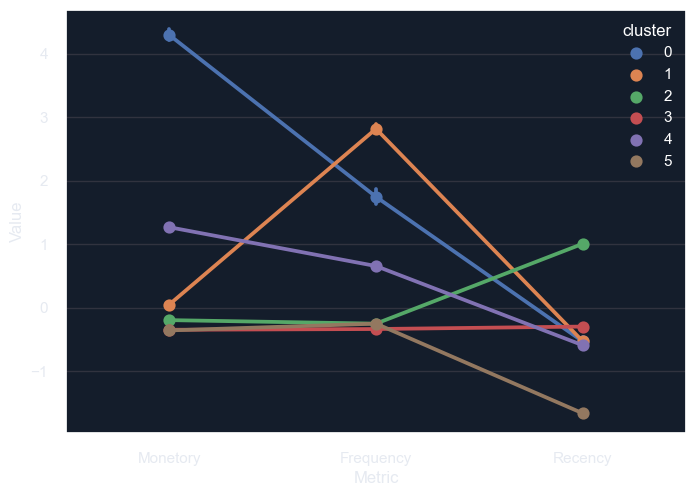

In [180]:
#Snake-plot curve for the 4 clusters
df  = rfm_df_AggClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_AggClusters['agglomerative_clusters']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

In [ ]:
#Snake-plot curve for the 4 clusters
df  = rfm_df_AggClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_AggClusters['agglomerative_clusters']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

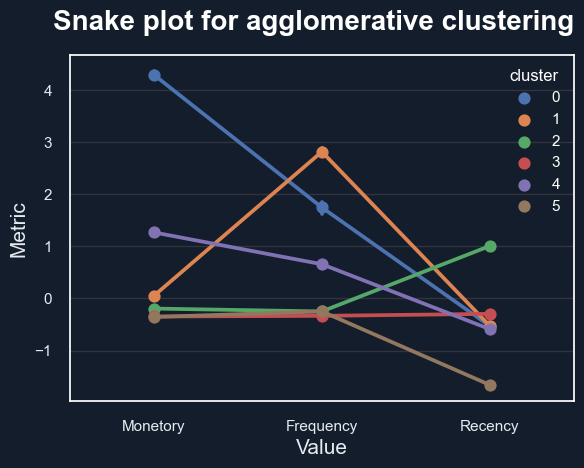

In [181]:
#plot panel facecolor
plt.figure(figsize = (6.5,4.5),facecolor='#141d2b')

#Snake-plot curve for the 4 clusters
df  = rfm_df_AggClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_AggClusters['agglomerative_clusters']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('Snake plot for agglomerative clustering', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Value", fontsize = 15)
plt.ylabel("Metric", fontsize = 15)

#save plot
plt.savefig("cancel_df/agg_snake", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

**complete linkage method**

# **Gaussian Mixture Model**

In [182]:
rfm_df.head()

Monetory  Frequency  Recency
0  15735.940          6       84
1  27975.799         20      363
2  10445.918          4       73
3   7516.600          1      361
5  33604.544         23       37

In [183]:
from scipy.stats import shapiro
# Extract the RFM values into a numpy array
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetory']].values

# Perform Shapiro-Wilk test on the RFM values
stat, p = shapiro(rfm_values)

# Print the results
print('Statistic=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The RFM data is likely Gaussian.')
else:
    print('The RFM data is likely not Gaussian.')

Statistic=0.332, p=0.000
The RFM data is likely not Gaussian.


In [184]:
rfm_df_gau = rfm_df.copy()

In [185]:
# Apply Box-Cox transformation to the Monetary column
rfm_df_gau['Monetory'] = stats.zscore(rfm_df_gau['Monetory'])

rfm_df_gau['Frequency'] = stats.zscore(rfm_df_gau['Frequency'])
# Normalize the Recency column using z-score normalization
rfm_df_gau['Recency'] = stats.zscore(rfm_df_gau['Recency'])

# Print the first five rows of the transformed dataset
print(rfm_df_gau.head())

   Monetory  Frequency   Recency
0  1.142642   1.045140 -1.591892
1  2.474239   5.612713  1.020429
2  0.567131   0.392630 -1.694887
3  0.248445  -0.586136  1.001702
5  3.086600   6.591479 -2.031961


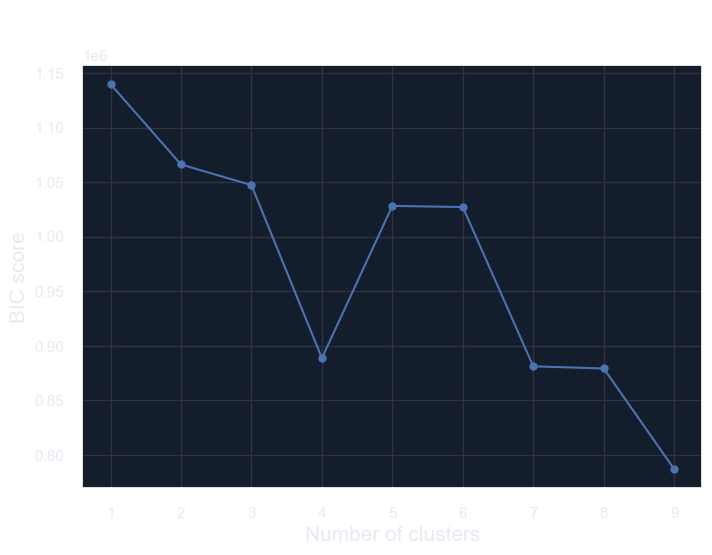

The optimal number of clusters is: 9


In [187]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Fit GMM models with different numbers of components
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(rfm_df) for n in n_components]

# Calculate BIC scores for each model
bic_scores = [model.bic(rfm_df) for model in models]

# Plot the BIC scores
plt.plot(n_components, bic_scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC score')


#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Number of clusters", fontsize = 15)
plt.ylabel("BIC score", fontsize = 15)

#Title 
plt.suptitle('BIC plot for Gaussian mixture model ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/gmm_optimal", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

# Choose the model with the lowest BIC score
best_n_components = n_components[np.argmin(bic_scores)]
print("The optimal number of clusters is:", best_n_components)

**Using RFM dataset without normalization**

In [188]:
# Extract the RFM values into a numpy array
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetory']].values

# Perform Shapiro-Wilk test on the RFM values
stat, p = shapiro(rfm_values)

# Print the results
print('Statistic=%.3f, p=%.3f' % (stat, p))
if stat < 1.96:
    print('The RFM data is likely Gaussian.')
else:
    print('The RFM data is likely not Gaussian.')

Statistic=0.332, p=0.000
The RFM data is likely Gaussian.


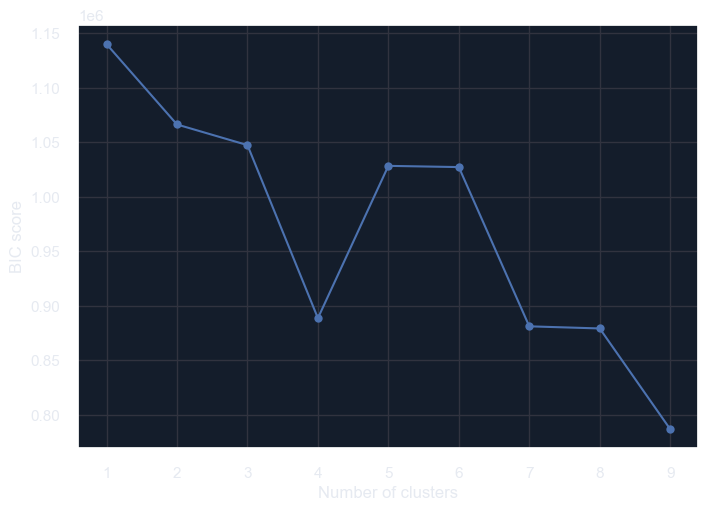

The optimal number of clusters is: 9


In [189]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Fit GMM models with different numbers of components
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(rfm_df) for n in n_components]

# Calculate BIC scores for each model
bic_scores = [model.bic(rfm_df) for model in models]

# Plot the BIC scores
plt.plot(n_components, bic_scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC score')
plt.show()

# Choose the model with the lowest BIC score
best_n_components = n_components[np.argmin(bic_scores)]
print("The optimal number of clusters is:", best_n_components)


In [190]:
rfm_df_GauClusters= rfm_df.copy()

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


# Fit the Gaussian mixture model
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(rfm_df_GauClusters)

# Predict the clusters
clusters = gmm.predict(rfm_df_GauClusters)

# Add the predicted clusters to the dataframe
rfm_df_GauClusters['GauCluster'] = clusters



In [192]:
rfm_df_GauClusters.head()

Monetory  Frequency  Recency  GauCluster
0  15735.940          6       84           5
1  27975.799         20      363           4
2  10445.918          4       73           5
3   7516.600          1      361           0
5  33604.544         23       37           4

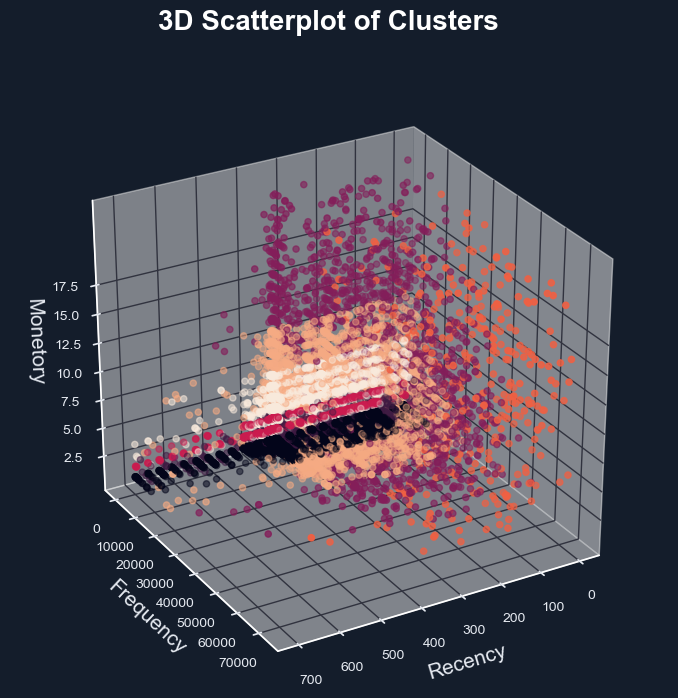

In [195]:
plt.figure(figsize=(8.5,7.8),facecolor='#141d2b')
ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetory']
ax.set_xlabel('Recency')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter3D(xline, zline,yline,c=rfm_df_GauClusters['GauCluster'])
ax.view_init(30, 60)
ax.set_xlabel('Recency',fontsize = 15,labelpad=10)
ax.set_ylabel('Frequency',fontsize = 15,labelpad=10)
ax.set_zlabel('Monetory',fontsize = 15,labelpad=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('3D Scatterplot of Clusters', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Ticks
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
ax.set_zticks([2.5,5.0,7.5,10.0,12.5,15.0,17.5])
# change fontsize
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
#save plot
plt.savefig("cancel_df/gmm_3d", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [196]:
Gaussian_df=rfm.copy()

In [197]:
Gaussian_df['cluster_pred']=clusters
merged_gaussian_df = pd.merge(Gaussian_df, df_cancelled, on="Customer_Id")
merged_gaussian_df.head()

Customer_Id  Monetory  Frequency  Recency  cluster_pred   Order_Id  \
0            4  15735.94          6       84             5  100385913   
1            4  15735.94          6       84             5  100385965   
2            4  15735.94          6       84             5  100385995   
3            4  15735.94          6       84             5  100386207   
4            4  15735.94          6       84             5  100559042   

  Order_Date    Status  Item_Id                  SKU  Quantity_Ordered  \
0 2020-12-20  canceled   626356  APPDAW59FF034995959                 2   
1 2020-12-20  canceled   626502  APPDAW59FF034995959                 2   
2 2020-12-20  canceled   626546  APPDAW59FF034995959                 2   
3 2020-12-20  canceled   626946  APPDAW59FF034995959                 2   
4 2021-09-16  canceled   899705  MATHUA5AF70A7D1E50A                 1   

    Price   Value  Discount_Amount    Total           Category  \
0  1108.2  2216.4           173.82  2042.58         Appliances   
1  1108.2  2216.4           173.82  2042.58         Appliances   
2  1108.2  2216.4           173.82  2042.58         Appliances   
3  1108.2  2216.4             0.00  2216.40         Appliances   
4  3695.9  3695.9             0.00  3695.90  Mobiles & Tablets   

    Payment_Method  By_St  Year   Month  Ref_Number Name_Prefix First_Name  \
0       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
1       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
2       Easypay_MA  Gross  2020  Dec-20      690850         Mr.     Reggie   
3  easypay_voucher  Gross  2020  Dec-20      690850         Mr.     Reggie   
4       jazzwallet  Gross  2021  Sep-21      690850         Mr.     Reggie   

  Middle_Initial Last_Name Gender  Age        Full_Name  \
0              C   Doughty      M   33  Doughty, Reggie   
1              C   Doughty      M   33  Doughty, Reggie   
2              C   Doughty      M   33  Doughty, Reggie   
3              C   Doughty      M   33  Doughty, Reggie   
4              C   Doughty      M   33  Doughty, Reggie   

                      Email Signed_Date  Phone_Number   Place_Name  County  \
0  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
1  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
2  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
3  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   
4  reggie.doughty@gmail.com  2010-01-04  314-677-4501  Springfield  Greene   

          City State  Zip_Code   Region  User_Name  Discount_Percent  \
0  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
1  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
2  Springfield    MO     65809  Midwest  rcdoughty         15.684894   
3  Springfield    MO     65809  Midwest  rcdoughty          0.000000   
4  Springfield    MO     65809  Midwest  rcdoughty          4.058551   

   Is_Discount  
0         True  
1         True  
2         True  
3        False  
4        False

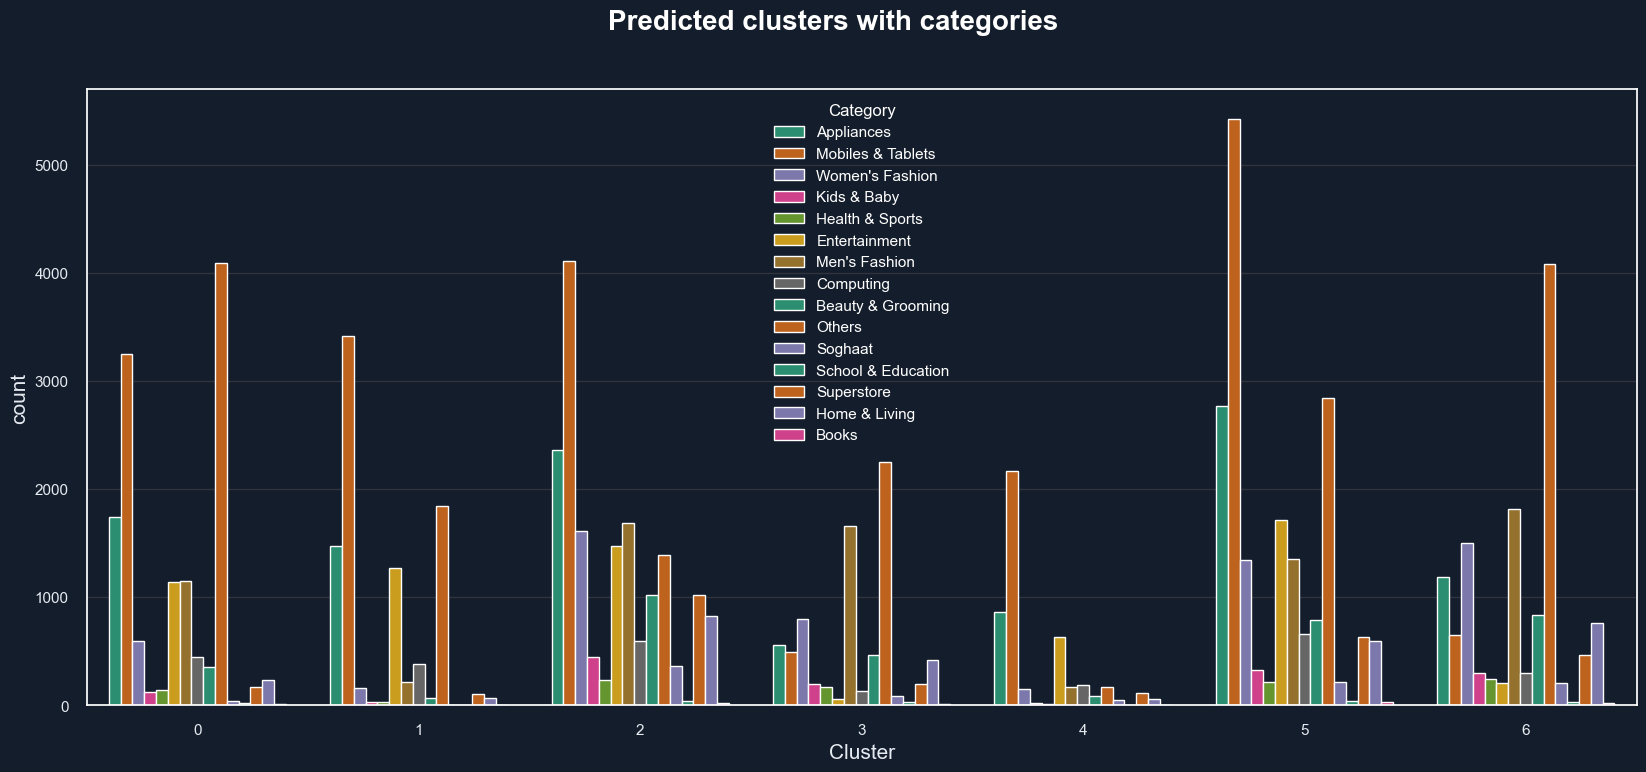

In [210]:
#category
plt.figure(figsize = (20,8),facecolor='#141d2b')

qualitative_colors = sns.color_palette("Dark2", 11)
sns.countplot(x=merged_gaussian_df['cluster_pred'],order=merged_gaussian_df['cluster_pred'].value_counts().sort_index().index,hue=merged_gaussian_df['Category'],palette=qualitative_colors)
              
#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with categories ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/gmm_category", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)


plt.show()

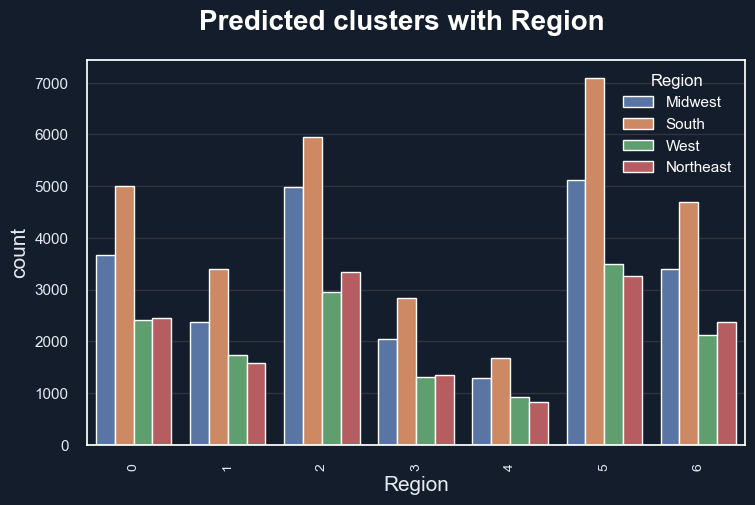

In [212]:
#Region
plt.figure(figsize = (8.5,5),facecolor='#141d2b')
sns.countplot(x=merged_gaussian_df['cluster_pred'],hue=merged_gaussian_df['Region'])
plt.xticks(rotation=90,fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'


#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Region", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with Region ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/gmm_region", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

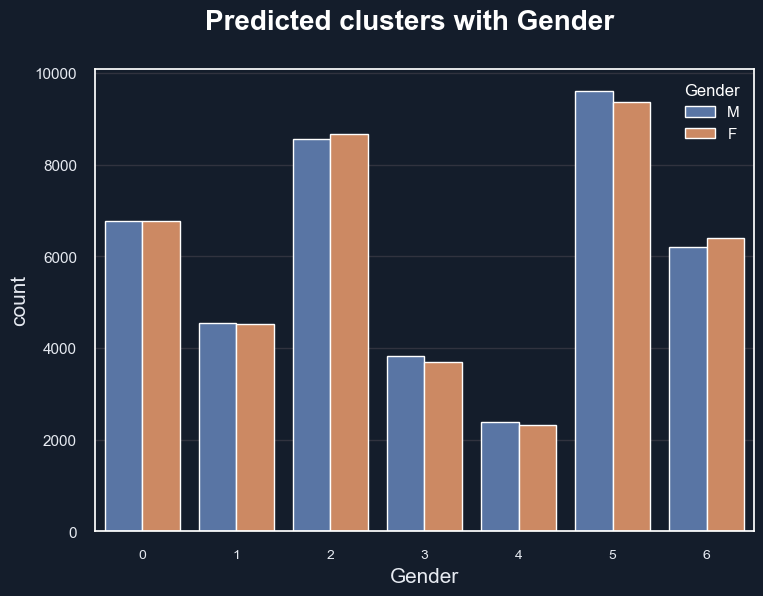

In [213]:
#Gender
#Gender
plt.figure(figsize = (8.5,6),facecolor='#141d2b')
sns.countplot(x=merged_gaussian_df['cluster_pred'],hue=merged_gaussian_df['Gender'])
plt.xticks(fontsize=10)

#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("count", fontsize = 15)
#Title 
plt.suptitle('Predicted clusters with Gender ', fontsize=20,fontweight="bold")

#save plot
plt.savefig("cancel_df/gmm_Gender", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

plt.show()

In [214]:
rfm_df_GauClusters.groupby('GauCluster').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetory' : ['mean','min','max','count']
})

Recency           Frequency              Monetory             \
                  mean min  max       mean min max          mean        min   
GauCluster                                                                    
0           265.183242   0  699   1.000000   1   1   1779.813586      0.000   
1           258.842795   0  699   2.477347   2   4   5764.603199   1960.000   
2           210.814836   0  698   9.756512   1  23  22807.733873      0.000   
3           260.997923   0  699   2.235312   2   3    470.277057      0.000   
4           164.316354   0  638  12.621984   1  23  53907.553410  21843.706   
5           240.104666   0  699   4.891467   1  11  11544.662921      0.000   
6           245.418744   0  699   3.785822   2   7   1376.053440      0.000   

                               
                   max  count  
GauCluster                     
0           12159.8000  13534  
1           11799.6000   3664  
2           57869.3000   1766  
3            1186.6875   3370  
4           73336.1760    373  
5           29399.7000   3879  
6            3357.0800   3329

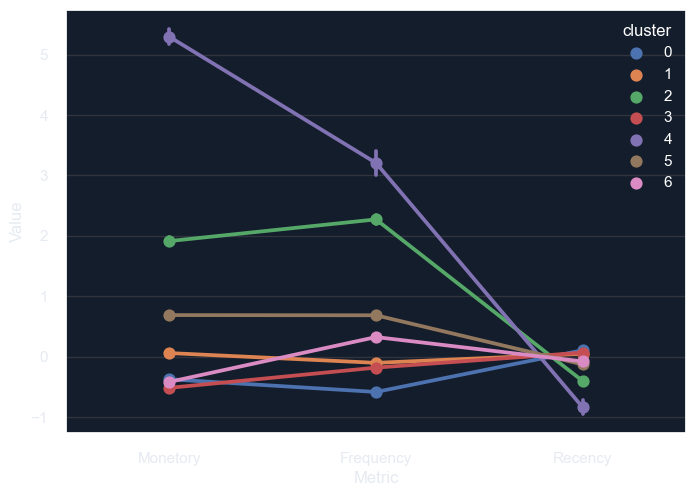

In [215]:
#Snake-plot curve for the 4 clusters
df  = rfm_df_GauClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_GauClusters['GauCluster']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')

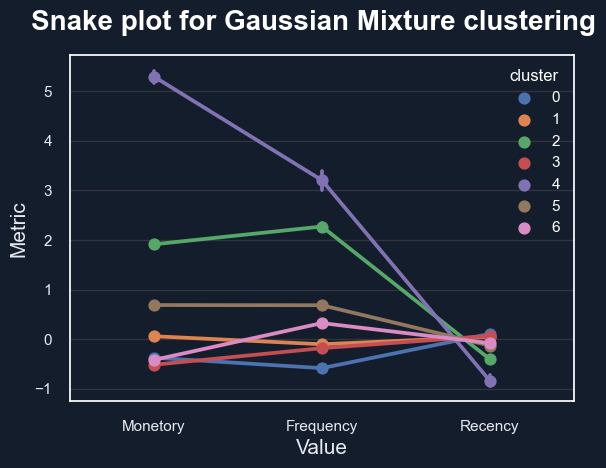

In [216]:
#plot panel facecolor
plt.figure(figsize = (6.5,4.5),facecolor='#141d2b')

#Snake-plot curve for the 4 clusters
df  = rfm_df_GauClusters[['Monetory','Frequency','Recency']]
normalized_df=(df-df.mean())/df.std()
normalized_df['cluster'] = rfm_df_GauClusters['GauCluster']
normalized_df.head()


df_melt = pd.melt(normalized_df.reset_index(), 
                        id_vars=['cluster'],
                        value_vars=['Monetory','Frequency','Recency'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
plt.ylabel('Value')
#point-plot
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')



#Axes facecolor
plt.rcParams['axes.facecolor'] = '#141d2b'

#Title 
plt.suptitle('Snake plot for Gaussian Mixture clustering', fontsize=20,fontweight="bold")

#Font
plt.rcParams['text.color'] = 'white'

#Axes color
plt.rcParams['axes.labelcolor'] = '#e6eaf1'

#Tics colot
plt.rcParams['xtick.color'] = '#e6eaf1'
plt.rcParams['ytick.color'] = '#e6eaf1'

#Grid color
plt.rcParams.update({"axes.grid" : True, "grid.color": "#31333f"})

#Lable names
plt.xlabel("Value", fontsize = 15)
plt.ylabel("Metric", fontsize = 15)

#save plot
plt.savefig("cancel_df/gmm_snake", facecolor='#141d2b', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

# **Silhouette Score For Each clustering techniques**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_method(df,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(rfm_df,' : KMeans',identified_clusters)
silhouette_method(rfm_df,' : Agglomerative',agglomerative_clusters)
silhouette_method(rfm_df,' : GaussianMixture',clusters)
print('=======================================================================')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
print(f'Silhouette Score(n=6): {silhouette_score(x_scaled, identified_clusters)}')

In [ ]:
print(f'Silhouette Score(n=6): {silhouette_score(x_scaled, agglomerative_clusters)}')

In [ ]:
print(f'Silhouette Score(n=7): {silhouette_score(rfm_df_GauClusters, clusters)}')

# **K Prototype**

In [ ]:
# Data pre-processing
new_df = df_cancelled.copy()
new_df.drop(['Order_Id',"Status","Payment_Method","Item_Id","SKU",'Name_Prefix','First_Name','Middle_Initial',"State","Last_Name",'Full_Name','Email',"Ref_Number","Signed_Date","Place_Name","Discount_Percent","Zip_Code","County","City","Phone_Number","User_Name","Order_Date","Is_Discount","By_St","Customer_Id","Year","Month"], axis = 1, inplace = True)
# Show the data after pre-processing
print('Dimension data: {} rows and {} columns'.format(len(new_df), len(new_df.columns)))
new_df.head()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical and numerical columns for clustering
cat_cols = ['Category','Gender','Region']
num_cols = ['Quantity_Ordered', 'Price', 'Value', 'Discount_Amount', 'Total', 'Age']







In [ ]:
new_df.info()

In [ ]:
# Scale the numerical columns using Min-Max scaling
new_df[num_cols] = (new_df[num_cols] - new_df[num_cols].min()) / (new_df[num_cols].max() - new_df[num_cols].min())

# Define a function to find the optimal number of clusters
def find_optimal_clusters(new_df, cat_cols, num_cols):
    # Initialize empty list to store the cost values for different cluster numbers
    cost = []
    # Loop through cluster numbers from 1 to 10
    for num_clusters in range(1, 11):
        # Initialize the KPrototypes algorithm with the current number of clusters
        kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=0)
        # Fit the algorithm to the data
        clusters = kproto.fit_predict(new_df.values, categorical=[5,6,8])
        # Append the cost value to the list
        cost.append(kproto.cost_)
    # Plot the cost values for different cluster numbers
    plt.plot(range(1, 11), cost)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost')
    plt.show()

# Find the optimal number of clusters
find_optimal_clusters(new_df=new_df, cat_cols=cat_cols, num_cols=num_cols)

In [ ]:

# Apply the KPrototypes algorithm with the optimal number of clusters
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0)
clusters = kproto.fit_predict(new_df.values, categorical=[5,6,8])

In [ ]:
# Visualize the clusters
# Create a copy of the dataset with the cluster labels
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters
# Create a pairplot of the numerical columns, colored by cluster
sns.pairplot(data=data_with_clusters, vars=num_cols, hue='Cluster')
plt.show()

**New Method**

In [ ]:
# Data pre-processing
new_df = df_cancelled.copy()
new_df.drop(['Order_Id',"Status","Payment_Method","Item_Id","SKU",'Name_Prefix','First_Name','Middle_Initial',"State","Last_Name",'Full_Name','Email',"Ref_Number","Signed_Date","Place_Name","Discount_Percent","Zip_Code","County","City","Phone_Number","User_Name","Order_Date","Is_Discount","By_St","Customer_Id","Year","Month"], axis = 1, inplace = True)
# Show the data after pre-processing
print('Dimension data: {} rows and {} columns'.format(len(new_df), len(new_df.columns)))
new_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
ss = StandardScaler()

In [ ]:
ss_market = new_df.copy()

cols = ss_market.select_dtypes(exclude='object').columns
ss_market[cols] = ss.fit_transform(ss_market[cols])

In [ ]:
# getting categorical columns and their indices.
catColumnsPos = [ss_market.columns.get_loc(col) for col in list(ss_market.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(ss_market.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

In [ ]:
from kmodes.kprototypes import KPrototypes

dfMatrix = ss_market.to_numpy()

In [ ]:
cost = []
for x in range(2,6):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = x, init = 'Huang', random_state = 0)
    clusters = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    print('Cluster initiation: {}'.format(clusters))

In [ ]:
# Converting the results into a dataframe and plotting them
import pandas as pd 
df_cost = pd.DataFrame()
df_cost['clusters'] = range(2,15)
df_cost['cost'] = cost

In [ ]:
# elbow method for number of clusters
sns.lineplot(x='clusters', y= 'cost', data=df_cost)

In [ ]:
# Kmeans tuned
#I'll go with 4 clusters. Let's see how their purchasing behaviours are.
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
clusters = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

**new method**

In [ ]:
# Data pre-processing
new_df = df_cancelled.copy()
new_df.drop(['Order_Id',"Status","Payment_Method","Item_Id","SKU",'Name_Prefix','First_Name','Middle_Initial',"State","Last_Name",'Full_Name','Email',"Ref_Number","Signed_Date","Place_Name","Discount_Percent","Zip_Code","County","City","Phone_Number","User_Name","Order_Date","Is_Discount","By_St","Customer_Id","Year","Month"], axis = 1, inplace = True)
# Show the data after pre-processing
print('Dimension data: {} rows and {} columns'.format(len(new_df), len(new_df.columns)))
new_df.head()

In [ ]:
new_df.head()

In [ ]:
new_df.info()

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


# Standardize the numerical variables
scaler = StandardScaler()
num_cols = ["Quantity_Ordered", "Price","Value","Discount_Amount","Total","Age"]
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

# Define the range of clusters to test
num_clusters = range(1, 11)

# Fit k-prototype models with different numbers of clusters and record the WCSS
wcss = []
for n in num_clusters:
    kproto = KPrototypes(n_clusters=n, init='Cao', verbose=0)
    clusters = kproto.fit_predict(new_df, categorical=[5,6,8]) # assuming columns 0, 1, 2 are categorical
    wcss.append(kproto.cost_)

# Plot the WCSS against the number of clusters
plt.plot(num_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Visualize the clusters in the dataset using a scatter plot
plt.scatter(new_df[:, 0], new_df[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **Principle componenet analysis**

In [ ]:
sales_df = amazon_sales_df.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
sales_std = scaler.fit_transform(sales_df)

# Perform PCA
pca = PCA()
sales_pca = pca.fit_transform(sales_std)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Choose the number of components
n_components = 3

# Use the selected number of components to transform the data
pca = PCA(n_components=n_components)
sales_pca = pca.fit_transform(sales_std)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(sales_pca)
labels = kmeans.predict(sales_pca)

# Add the cluster labels to the original dataset
sales_df['Cluster'] = labels

# Plot the clusters
for i in range(n_components):
    for j in range(i+1, n_components):
        plt.scatter(sales_pca[:, i], sales_pca[:, j], c=labels, cmap='viridis')
        plt.xlabel('PC {}'.format(i+1))
        plt.ylabel('PC {}'.format(j+1))
        plt.show()
